In [102]:
import data_utils
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

In [2]:
data = data_utils.process_data(data_utils.load_data('../data'), 8000, 8000)

blue
green
nie
one
red
tak
two
_


In [307]:
train_data = {cat: values[2:-2] for cat, values in data.items()}
test_data = {cat: values[-2:] + values[:2] for cat, values in data.items()}

In [10]:
dataset = [(cat, seq) for cat, values in data.items() for seq in values]

In [259]:
train_dataset = [(cat, seq) for cat, values in train_data.items() for seq in values]
test_dataset = [(cat, seq) for cat, values in test_data.items() for seq in values]

In [139]:
RGB = ('red', 'green', 'blue')

In [315]:
def loss(weights, data=dataset, d=1, alpha=1, l1=0, l2=0):
    weights = weights.reshape((W // D, FEATURES))
    total = 0
    features = [(cat, values[:W:D] @ weights) for cat, values in data]
    n = 0
    for cat, f in features:
        for cat2, f2 in features:
            if cat2 not in RGB and cat2 not in RGB:
                continue
            n += 1

            p = (1 if cat == cat2 else -alpha)
            total += np.minimum(((f - f2) ** 2).sum(), d) * p
    return total / n + l2 * (weights ** 2).mean() + l1 * np.abs(weights).mean()

def loss_and_grad(weights, data=dataset, d=1, alpha=1, l1=0, l2=0):
    weights = weights.reshape((W // D, FEATURES))
    total = 0
    features = [(cat, values[:W:D] @ weights) for cat, values in data]
    dloss_dw_total = 0

    n = 0
    for (cat, f), (_, v) in zip(features, data):
        for (cat2, f2), (_, v2) in zip(features, data):
            if cat2 not in RGB and cat2 not in RGB:
                continue
            n += 1

            p = (1 if cat == cat2 else -alpha)
            total += np.minimum(((f - f2) ** 2).sum(), d) * p
            dloss_df = 2 * (f - f2) * p
            dloss_df2 = -1 * 2 * (f - f2) * p
            
            dloss_dw = v[:W:D].reshape(-1, 1) @ dloss_df.reshape(1, -1)
            dloss_dw2 = v2[:W:D].reshape(-1, 1) @ dloss_df2.reshape(1, -1)
            
            m = 1
            m = 0 if cat != cat2 and ((f - f2) ** 2).sum() > d else 1
            
            dloss_dw_total += (dloss_dw + dloss_dw2) * m

    loss = total / n + l2 * (weights ** 2).mean() + l1 * np.abs(weights).mean()
    dloss_dw_total = dloss_dw_total / n + (l2 * 2 * weights) /  (W * FEATURES)  + l1 * np.sign(weights) / (W * FEATURES)
    return loss, dloss_dw_total

In [334]:
def get_batch(data, rgb, other):
    rgb_ids = [i for i, (cat, _) in enumerate(data) if cat in RGB]
    other_ids = [i for i, (cat, _) in enumerate(data) if cat not in RGB]
    return [data[i] for i in np.random.choice(rgb_ids, size=rgb)] + [data[i] for i in np.random.choice(other_ids, size=other)]

In [308]:
def show_weights_out(test_data=test_data, train_data=train_data, weights=weights):
    testc = {'red': 'magenta', 'blue': 'cyan', 'green': 'lime'}
    fig = plt.figure(figsize=(10, 8))
    if weights.shape[1] == 3:
        ax = fig.add_subplot(projection='3d')
    for c, vs in train_data.items():
        xy = np.array([v[:W:D] @ weights for v in vs])
        if weights.shape[1] == 3:
            ax.scatter(xy[:,0], xy[:,1], xy[:,2], color=c if c in RGB else 'black')
        else:
            plt.scatter(xy[:,0], xy[:,1], color=c if c in RGB else 'black')
    for c, vs in test_data.items():
        xy = np.array([v[:W:D] @ weights for v in vs])
        if weights.shape[1] == 3:
            ax.scatter(xy[:,0], xy[:,1], xy[:,2], color=testc[c] if c in RGB else 'black')
        else:
            plt.scatter(xy[:,0], xy[:,1], color=testc[c] if c in RGB else 'black')
    
    plt.show()
    plt.plot(weights)
    plt.show()

In [397]:
FEATURES = 3
W = 400
D = 20

L1 = 1e-5
L2 = 0
LR = 1e-5

ALPHA = 0.1
D=4

0	0.03840066477484887	-0.07506610921720368
red [ 0.02703253  0.55499649 -0.59865435] [0.29030431 0.43341195 0.38439136] [ 0.05377181  0.7211908  -0.58383532] [0.34141878 0.83599556 0.37033624]
green [ 0.68256922  1.00074799 -0.19938263] [0.7322718  0.71318248 0.38759295] [ 0.02079861  0.65872941 -0.0580527 ] [0.52140147 0.25669596 0.27855672]
blue [ 0.67852394  1.10355727 -0.33443866] [0.40534148 0.76409343 0.56612911] [0.09834879 1.40202639 1.06379784] [0.22996373 1.47374534 1.39741078]



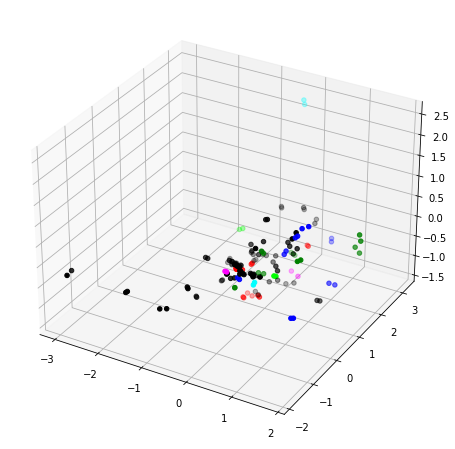

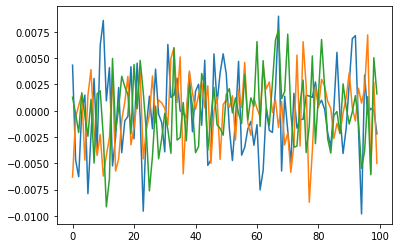

25	0.0024632657914771604	-0.07726741463634629
red [ 0.03728151  0.36452574 -0.67015454] [0.28894097 0.23413613 0.35487806] [ 0.04446589  0.40184409 -0.65434676] [0.28731137 0.53053992 0.41231828]
green [ 0.68515989  0.56648884 -0.27089434] [0.64300606 0.39470763 0.39707269] [ 0.21835557  0.43704205 -0.23635085] [0.39373058 0.02395936 0.07377942]
blue [ 0.80763754  0.69551753 -0.49811561] [0.40953121 0.43047601 0.42346543] [0.41166442 0.88463334 0.53856337] [0.02511968 0.95070432 0.88369245]

50	-0.028629154851516715	-0.08031325817432448
red [ 0.11278818  0.37446162 -0.69313969] [0.32410983 0.18745718 0.3413478 ] [ 0.14182154  0.39446602 -0.6648126 ] [0.3285063  0.50252    0.41299576]
green [ 0.88529788  0.58114864 -0.26545752] [0.65099666 0.34063672 0.40200701] [ 0.47766057  0.45590611 -0.30668287] [0.22573856 0.06083014 0.01968559]
blue [ 1.09750033  0.71201855 -0.55194009] [0.50354594 0.37345952 0.34596754] [0.76689619 0.78157491 0.25931953] [0.30061489 0.80715135 0.60038546]

75	-0.

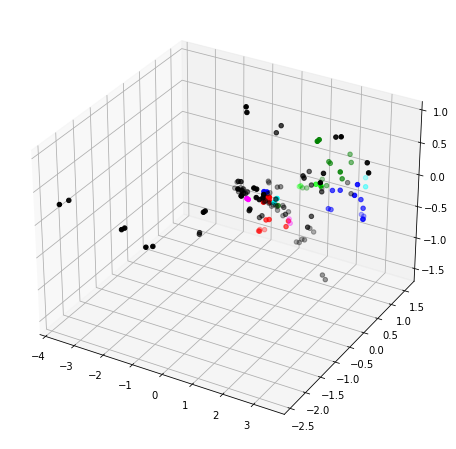

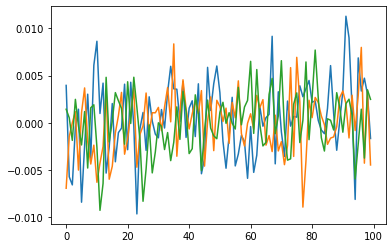

275	-0.17991423886279764	-0.10540004968117427
red [ 0.21124159  0.54179525 -0.572539  ] [0.24342207 0.08856077 0.2452966 ] [ 0.22753283  0.54552474 -0.49843684] [0.19877062 0.51563015 0.36220707]
green [1.68688555 0.88654718 0.16152455] [0.51776744 0.26058054 0.29060449] [ 1.40096403  0.77542182 -0.01907928] [0.31901662 0.04553363 0.05856822]
blue [ 2.15450313  1.07586489 -0.33217054] [0.78205416 0.35677401 0.22141561] [ 1.75529918  0.78680523 -0.11248283] [0.95574176 0.58163485 0.0323501 ]

300	-0.18839579542991178	-0.10722573325906423
red [ 0.21349156  0.55123854 -0.5631336 ] [0.23256697 0.08615752 0.24298259] [ 0.22315465  0.55345008 -0.48990031] [0.1820998  0.51517747 0.36621521]
green [1.73204403 0.89840392 0.20497103] [0.50717242 0.25518293 0.28158873] [1.43619063 0.78958705 0.02718485] [0.3498521  0.05773982 0.08575584]
blue [ 2.20067704  1.09269837 -0.30562142] [0.7799869  0.35731226 0.22387591] [ 1.78013816  0.79177128 -0.10498794] [0.96797823 0.57473743 0.03054965]

325	-0.19

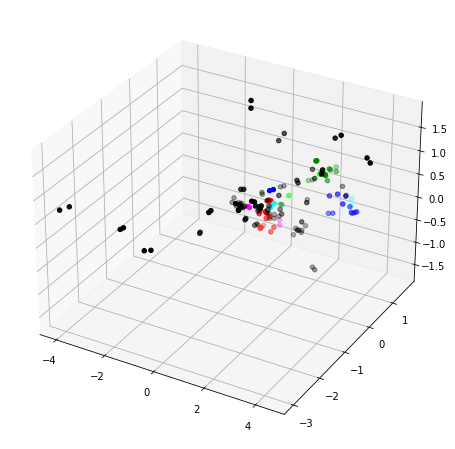

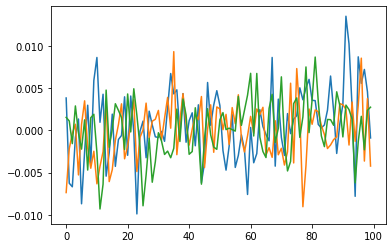

525	-0.2326092611995574	-0.11635716750567528
red [ 0.22297611  0.63883124 -0.57076997] [0.202438   0.08877558 0.2652277 ] [ 0.19550648  0.62806374 -0.49830472] [0.09178053 0.52996832 0.42516527]
green [1.97550892 1.00857154 0.44650381] [0.45615999 0.2324528  0.25410664] [1.5943569  0.8927582  0.25743604] [0.53573912 0.16016875 0.25034842]
blue [ 2.45893092  1.23369487 -0.22220491] [0.74481946 0.36762855 0.25734159] [ 1.89018677  0.87725741 -0.12081234] [1.0388275  0.5759316  0.09846449]

550	-0.2353052554844464	-0.11673291340882701
red [ 0.22642967  0.64572353 -0.57357532] [0.20299446 0.0891656  0.26683776] [ 0.19797417  0.63356705 -0.49947173] [0.08986101 0.53127168 0.42801125]
green [1.99585888 1.01701289 0.46924262] [0.45590452 0.23086106 0.25740941] [1.60465202 0.89938068 0.27227769] [0.55181366 0.16811467 0.26584748]
blue [ 2.48292662  1.24514064 -0.21817877] [0.74368195 0.36838023 0.261838  ] [ 1.90069168  0.88476047 -0.12373128] [1.0491556  0.57735559 0.10244592]

575	-0.2377890

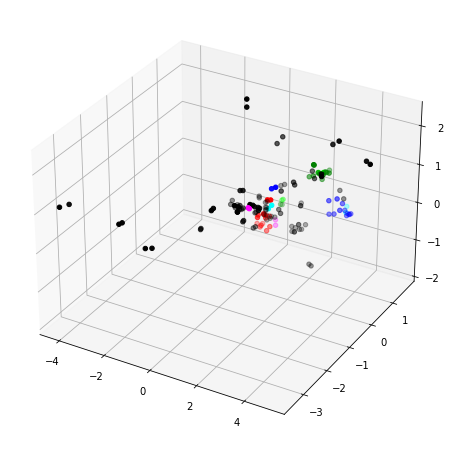

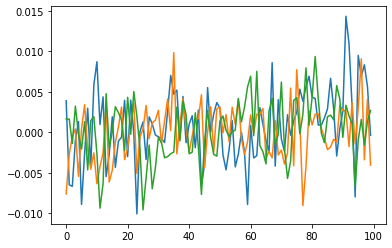

775	-0.2543414962784191	-0.11837653350041723
red [ 0.2452416   0.70480507 -0.63739405] [0.20806865 0.09585026 0.29844337] [ 0.2000985   0.67365829 -0.5590701 ] [0.06564402 0.53423583 0.47780125]
green [2.09448225 1.07113007 0.59055084] [0.44115526 0.21529572 0.28798173] [1.65309469 0.94280067 0.33858217] [0.63377708 0.21973537 0.3619921 ]
blue [ 2.63391631  1.33513882 -0.27485941] [0.73609286 0.37075931 0.32199245] [ 1.95400007  0.95412999 -0.21725166] [1.10756216 0.59488349 0.17034425]

800	-0.2562168906677648	-0.11845125112052952
red [ 0.24754555  0.71088054 -0.64654732] [0.20871499 0.09669204 0.30281388] [ 0.20073913  0.67770601 -0.56800749] [0.06384415 0.53444818 0.48386932]
green [2.10291297 1.07566035 0.60125144] [0.43988809 0.21366139 0.29292505] [1.65789786 0.9460683  0.34298404] [0.63979048 0.22377533 0.37094262]
blue [ 2.64975759  1.3448595  -0.28620368] [0.73714325 0.37133167 0.33021933] [ 1.96072446  0.9619081  -0.23083506] [1.11458551 0.59746086 0.17881276]

825	-0.2580517

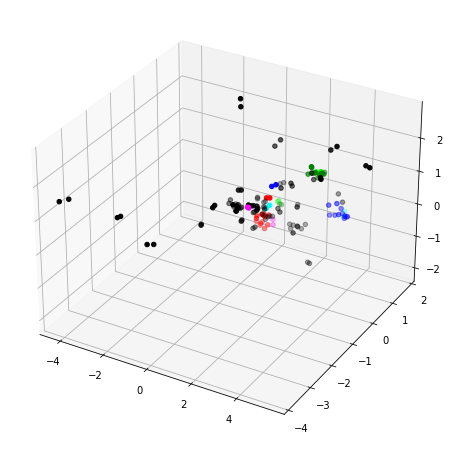

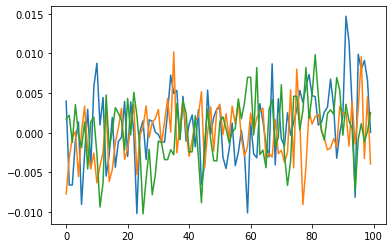

1025	-0.2712649475834605	-0.11898535525695503
red [ 0.29271058  0.75978256 -0.7184757 ] [0.20685742 0.10385614 0.33775881] [ 0.23562373  0.70454222 -0.63220561] [0.06844487 0.53141866 0.52722371]
green [2.18566432 1.10399967 0.68423659] [0.43351362 0.19938027 0.33306124] [1.70984836 0.95982843 0.38867739] [0.68408098 0.24849941 0.44836572]
blue [ 2.80514019  1.41972552 -0.38885673] [0.75829618 0.3742996  0.4028249 ] [ 2.04119485  1.02048947 -0.33375326] [1.18632011 0.61715345 0.24369259]

1050	-0.2727777553201715	-0.11900641413997605
red [ 0.2984656   0.76461717 -0.72553633] [0.2062407  0.10460126 0.3411344 ] [ 0.24048082  0.70660189 -0.63750184] [0.07010185 0.53058802 0.53001227]
green [2.1941521  1.10614606 0.69442121] [0.43297322 0.19778805 0.33856434] [1.71470456 0.96015212 0.3941622 ] [0.68735302 0.25001903 0.45670689]
blue [ 2.8214225   1.42685124 -0.3989732 ] [0.76111393 0.37427787 0.40996471] [ 2.04887713  1.02533573 -0.34334505] [1.19299831 0.61827715 0.24901938]

1075	-0.2742

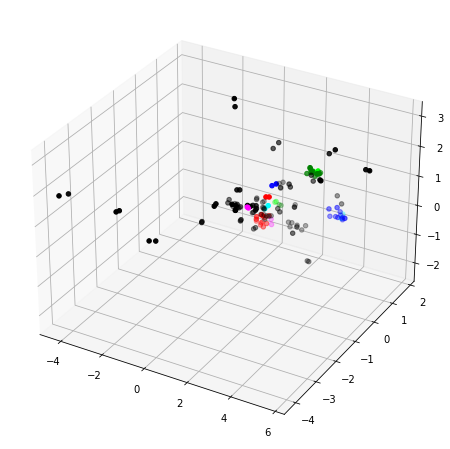

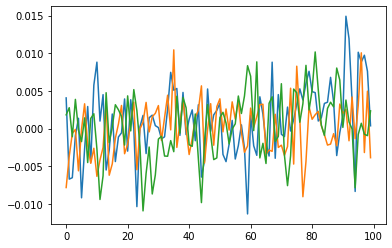

1275	-0.28493817217418765	-0.11904091656937672
red [ 0.3470134   0.80811057 -0.79467355] [0.20117015 0.11248206 0.37418281] [ 0.2789656   0.72476262 -0.68755125] [0.08206769 0.52394093 0.55449909]
green [2.25507337 1.12575311 0.78164952] [0.4254954  0.18579977 0.38633831] [1.75767685 0.96210167 0.45526863] [0.70957445 0.26452596 0.51838278]
blue [ 2.94821872  1.48645941 -0.4710639 ] [0.77973341 0.37136112 0.45188338] [ 2.10875858  1.06686164 -0.40897855] [1.24361328 0.62882928 0.28065906]

1300	-0.28612185435639076	-0.11905506553302508
red [ 0.35295506  0.81278591 -0.80342108] [0.20034183 0.11337256 0.37828421] [ 0.28346381  0.72654179 -0.69434517] [0.08333199 0.52302517 0.55797237]
green [2.26127105 1.12732734 0.78949983] [0.42453756 0.18436622 0.39110977] [1.76362304 0.96249888 0.4600906 ] [0.71203973 0.26623696 0.52216224]
blue [ 2.96083568  1.4921182  -0.47856265] [0.78092841 0.37059364 0.45505438] [ 2.11461671  1.07068769 -0.41591179] [1.24776281 0.62936717 0.28368375]

1325	-0.28

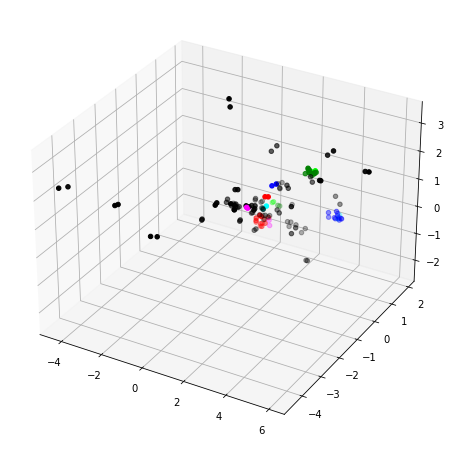

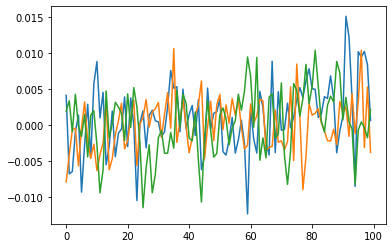

1525	-0.29495963243417384	-0.11903190185351312
red [ 0.40350817  0.8515593  -0.86400904] [0.19347596 0.12000367 0.40769158] [ 0.31979736  0.74043982 -0.73362855] [0.09581923 0.51692652 0.57691253]
green [2.3237875  1.14487871 0.8680221 ] [0.42487412 0.17645757 0.42984743] [1.81439955 0.96481869 0.51785214] [0.73113673 0.28050502 0.56178285]
blue [ 3.06235199  1.53886587 -0.50778747] [0.7884213  0.36315855 0.46840998] [ 2.16057756  1.10042164 -0.43453193] [1.28289394 0.63471929 0.27950619]

1550	-0.2957590640020628	-0.11904663547820427
red [ 0.40840081  0.85477797 -0.86971503] [0.192862   0.11996135 0.41052098] [ 0.32284938  0.74117154 -0.73709773] [0.0966238  0.51619259 0.57884821]
green [2.33109197 1.14683686 0.87513998] [0.42540008 0.1759983  0.43317343] [1.82071204 0.964903   0.52396316] [0.73294473 0.28172509 0.56579164]
blue [ 3.07264487  1.54352586 -0.50947339] [0.789068   0.36258285 0.46931995] [ 2.16496002  1.10252734 -0.43316252] [1.28605866 0.63485579 0.27627719]

1575	-0.296

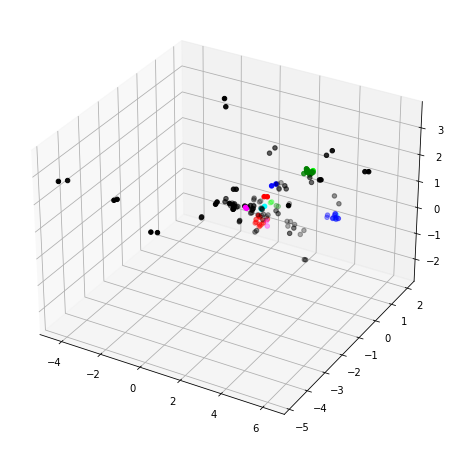

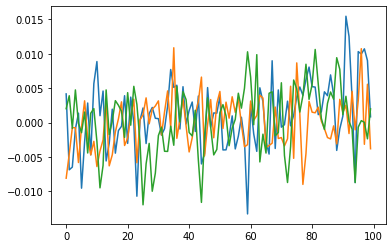

1775	-0.3015775894220727	-0.11915883564822008
red [ 0.44595202  0.87881044 -0.91036204] [0.1896232  0.11699553 0.43018038] [ 0.34133171  0.74348389 -0.75572253] [0.09752806 0.50765276 0.58563465]
green [2.39564148 1.16280037 0.9369783 ] [0.4324353  0.17272317 0.4618526 ] [1.883904   0.96748584 0.56596796] [0.75107937 0.29386842 0.59166803]
blue [ 3.15858593  1.58077666 -0.51188594] [0.79423518 0.35795578 0.4749395 ] [ 2.21117987  1.12433712 -0.43698839] [1.32271758 0.64142073 0.26406256]

1800	-0.3020940306641274	-0.11914019741288653
red [ 0.44973629  0.88038568 -0.91287146] [0.18950932 0.1160448  0.43153513] [ 0.3431089   0.74297961 -0.75584345] [0.09770181 0.50664288 0.58534442]
green [2.40370061 1.16448232 0.94364956] [0.4339089  0.17263912 0.4646375 ] [1.8913242  0.96746417 0.56991561] [0.75344028 0.29524031 0.5939806 ]
blue [ 3.16825283  1.58442661 -0.51116715] [0.79506267 0.35772422 0.47581906] [ 2.21629813  1.12629226 -0.43821533] [1.32711351 0.64247732 0.26435659]

1825	-0.3025

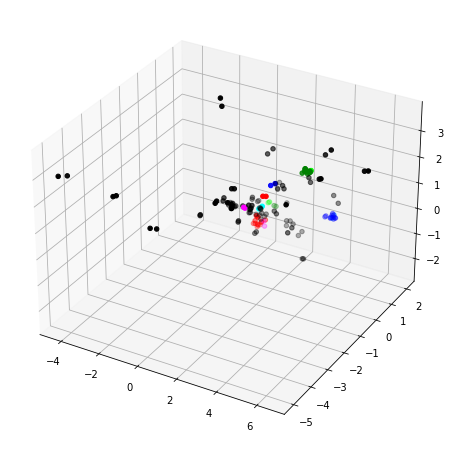

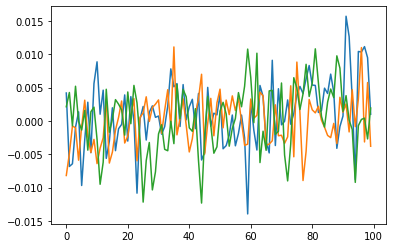

2025	-0.30605429474397616	-0.11891942975951546
red [ 0.48307917  0.8992325  -0.94479098] [0.19012638 0.11143486 0.44591396] [ 0.35884157  0.74312593 -0.76938062] [0.09918712 0.4984813  0.58904389]
green [2.47766883 1.18556126 0.98056084] [0.44902779 0.17334466 0.48375067] [1.95936975 0.97402187 0.59041111] [0.77394625 0.31218747 0.60401306]
blue [ 3.25157228  1.62143392 -0.51674442] [0.80105263 0.35533467 0.48211021] [ 2.25653324  1.14880124 -0.44930483] [1.36054301 0.65246466 0.2589277 ]

2050	-0.3064459973515326	-0.11890746348377151
red [ 0.4868382   0.90131705 -0.94755075] [0.19043484 0.11101905 0.44709191] [ 0.36113603  0.74303536 -0.76992435] [0.09989641 0.4972555  0.58851291]
green [2.48735711 1.18787817 0.98531696] [0.45128355 0.17329661 0.48619534] [1.96822258 0.97496045 0.59268945] [0.77684143 0.31416994 0.60485497]
blue [ 3.26238479  1.62554432 -0.51658187] [0.80255533 0.35501076 0.48254016] [ 2.26281479  1.15168928 -0.45082421] [1.36588649 0.65369704 0.25869475]

2075	-0.306

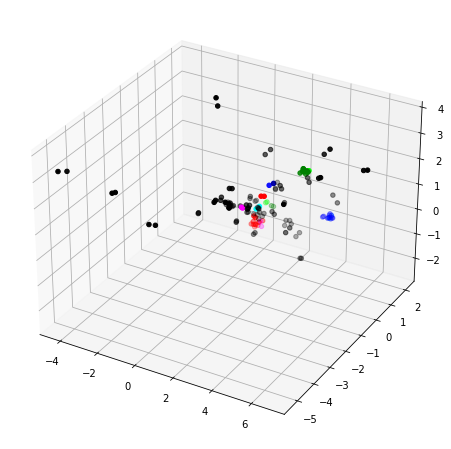

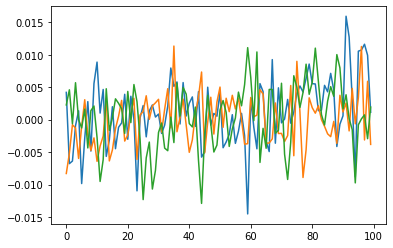

2275	-0.3097494967020894	-0.11863293979597335
red [ 0.51608785  0.92190915 -0.97463444] [0.19421605 0.10827531 0.45941542] [ 0.37596896  0.74634556 -0.78202683] [0.1023535  0.49050274 0.59270535]
green [2.56514691 1.2140187  1.01496163] [0.46988122 0.17559224 0.50278185] [2.03697333 0.98368918 0.6177733 ] [0.79511913 0.33289363 0.6117653 ]
blue [ 3.34501466  1.66486513 -0.51898785] [0.81163504 0.35394055 0.48896412] [ 2.3095859   1.17916345 -0.46292278] [1.40683584 0.66671092 0.2582851 ]

2300	-0.3101004001470775	-0.11857723697059938
red [ 0.51921886  0.92393234 -0.97720211] [0.1947338  0.10785388 0.46066128] [ 0.3776095   0.74667533 -0.78331717] [0.10269876 0.48990251 0.59344486]
green [2.5736431  1.21688551 1.01843544] [0.47200496 0.17591426 0.50457122] [2.04417172 0.98442541 0.6212165 ] [0.79691617 0.33489847 0.61250732]
blue [ 3.35389142  1.66916333 -0.51905561] [0.81261169 0.35394487 0.48980676] [ 2.31413352  1.18198657 -0.46399246] [1.41087683 0.66815822 0.25845053]

2325	-0.3104

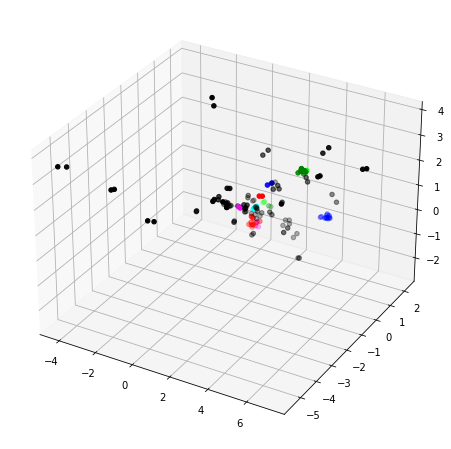

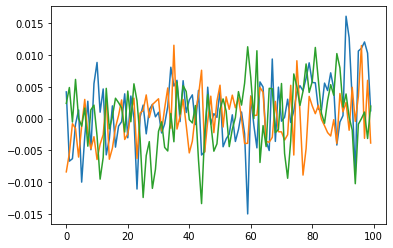

2525	-0.31316800977608705	-0.11801612061927828
red [ 0.54619727  0.93987086 -0.99706305] [0.19974498 0.10318781 0.47108606] [ 0.39133974  0.74793237 -0.79245254] [0.10523732 0.48383309 0.59923157]
green [2.64897202 1.24066074 1.04916887] [0.49116299 0.17838164 0.5203362 ] [2.10855973 0.98982667 0.65371008] [0.81173448 0.35146884 0.62035132]
blue [ 3.43288054  1.70547559 -0.51850174] [0.8219288  0.3540503  0.49783084] [ 2.3563789   1.20512415 -0.47040212] [1.44866147 0.67983305 0.25793194]

2550	-0.31350296412681067	-0.11793062205408687
red [ 0.5484959   0.94162753 -0.99927205] [0.20044112 0.10267902 0.47224725] [ 0.3921993   0.74816277 -0.79342955] [0.10521078 0.48325166 0.59973569]
green [2.65656316 1.24335104 1.05233264] [0.49316124 0.17869282 0.52210835] [2.11550749 0.99058852 0.65689903] [0.81304883 0.35339616 0.62105877]
blue [ 3.44107534  1.70954632 -0.51861951] [0.82300245 0.35414847 0.49875026] [ 2.3607482   1.20782595 -0.47134383] [1.45286968 0.681241   0.25785513]

2575	-0.31

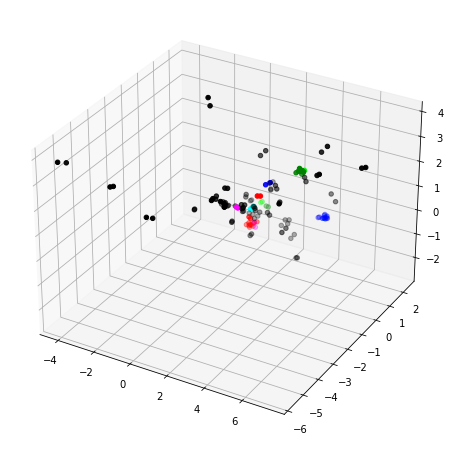

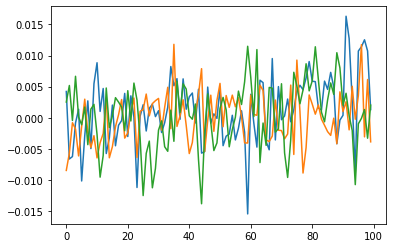

2775	-0.31630978836742124	-0.11697286464602673
red [ 0.57346584  0.95458037 -1.01442584] [0.20656419 0.09736379 0.48067122] [ 0.40721585  0.74701671 -0.79799107] [0.10934788 0.47523981 0.60156939]
green [2.72825453 1.26577772 1.08048439] [0.51157552 0.18108558 0.53719127] [2.17763331 0.99655419 0.68468156] [0.82539793 0.37033511 0.62523228]
blue [ 3.51559953  1.74454453 -0.52053864] [0.83116641 0.35464662 0.50778701] [ 2.3994272   1.23045889 -0.48060399] [1.48699099 0.69302946 0.25974892]

2800	-0.316600435444363	-0.11682840941468715
red [ 0.57597756  0.95551873 -1.01540052] [0.20739065 0.09662183 0.48137624] [ 0.40869002  0.74658259 -0.79788331] [0.10967059 0.47429217 0.60151009]
green [2.73569955 1.26821173 1.08355177] [0.51348367 0.18147046 0.53866047] [2.18439842 0.99687478 0.68807069] [0.82691312 0.37221441 0.62564391]
blue [ 3.52361834  1.74820129 -0.52054882] [0.83207202 0.35471184 0.50881442] [ 2.40383865  1.23267151 -0.48138214] [1.49100803 0.69436756 0.26007213]

2825	-0.3168

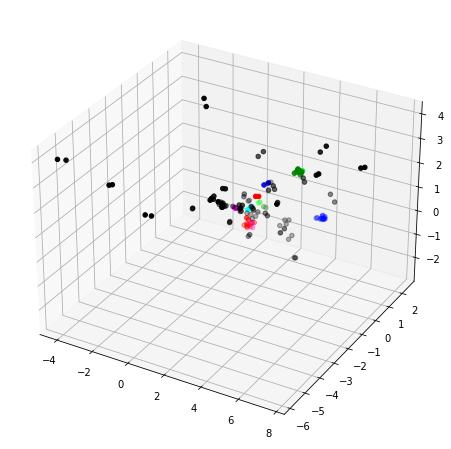

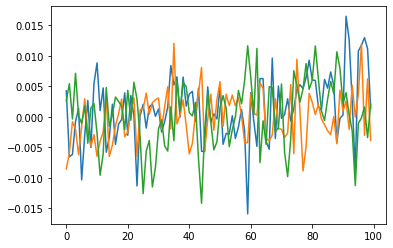

3025	-0.31902534429242	-0.11557704982745842
red [ 0.60181256  0.96574238 -1.02437175] [0.21417306 0.09146883 0.48830933] [ 0.42683702  0.74275377 -0.79564385] [0.1149679  0.46440745 0.59978709]
green [2.8058972  1.29083553 1.10960161] [0.53072254 0.18455211 0.55138941] [2.24519182 1.0025927  0.71635611] [0.84019497 0.3891031  0.62891267]
blue [ 3.59802495  1.78071811 -0.51956124] [0.8406543  0.35435918 0.51701941] [ 2.44420999  1.25247138 -0.48579758] [1.52479031 0.70466723 0.26049703]

3050	-0.3192757338330439	-0.11542511272236537
red [ 0.60496842  0.96720275 -1.02541097] [0.2148391  0.09106611 0.48916238] [ 0.42935039  0.74266724 -0.79534373] [0.11589768 0.46352019 0.59956079]
green [2.81385247 1.29385097 1.11212628] [0.53267057 0.18505314 0.55267498] [2.25179577 1.00369327 0.71929702] [0.84162775 0.39115556 0.62920124]
blue [ 3.60624832  1.78468349 -0.51955794] [0.84158768 0.35442721 0.51795978] [ 2.44846148  1.25509756 -0.48640851] [1.52814425 0.70608417 0.26068833]

3075	-0.319524

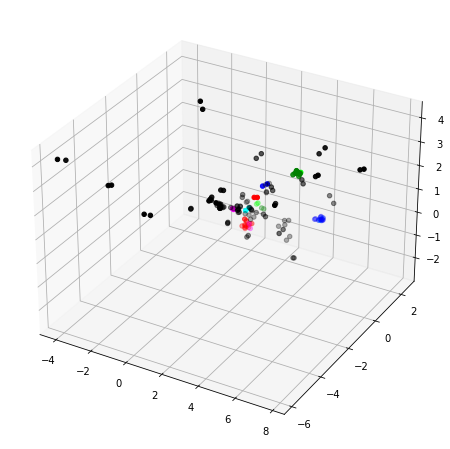

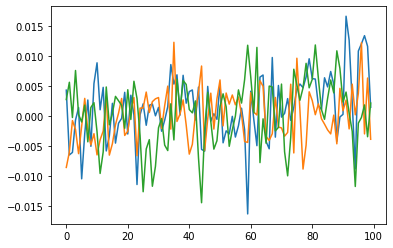

3275	-0.32137443141725913	-0.1139083607837544
red [ 0.62664256  0.9764394  -1.03142877] [0.2223756  0.08570976 0.49599426] [ 0.44586453  0.73855401 -0.79051734] [0.12088676 0.45374134 0.59676436]
green [2.87520139 1.31594272 1.13755483] [0.54761256 0.18777029 0.56476243] [2.30362148 1.01133774 0.74610302] [0.85002952 0.40611039 0.63307177]
blue [ 3.6706238   1.81559535 -0.51740559] [0.84777992 0.35452077 0.52672553] [ 2.48075148  1.27441526 -0.48974131] [1.55547399 0.71607421 0.26163089]

3300	-0.32158861184594983	-0.11374779220349465
red [ 0.62953054  0.97782247 -1.03200271] [0.22306576 0.08531432 0.49670723] [ 0.44828289  0.73856203 -0.78994814] [0.12174449 0.45295662 0.59644165]
green [2.88249938 1.31880743 1.14037356] [0.54934725 0.18817872 0.56603846] [2.30995522 1.01251509 0.74891318] [0.85135407 0.40797487 0.63335574]
blue [ 3.67828526  1.81935986 -0.51727706] [0.84861955 0.35457694 0.52773754] [ 2.48551579  1.27687332 -0.49009107] [1.55928969 0.71732762 0.26180732]

3325	-0.321

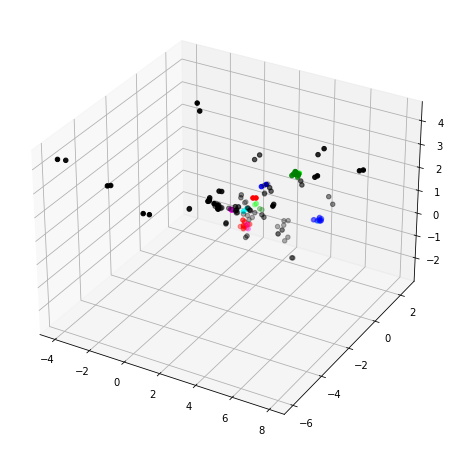

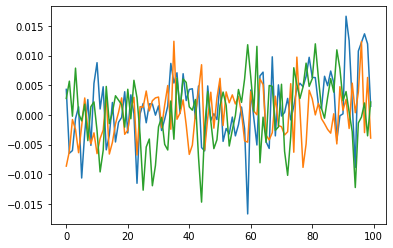

3525	-0.3233772176317154	-0.11195628160632862
red [ 0.65398596  0.98818499 -1.03686365] [0.2292901  0.08152433 0.50327142] [ 0.46815725  0.73680232 -0.78481918] [0.12868574 0.44456816 0.59270814]
green [2.94445912 1.3409406  1.16439458] [0.56478197 0.19103938 0.57755784] [2.36194369 1.01927537 0.7759129 ] [0.86152233 0.42209284 0.63688643]
blue [ 3.74265797  1.84831658 -0.51433052] [0.85526351 0.35372681 0.53576917] [ 2.52141277  1.29450138 -0.49143461] [1.58877816 0.72522092 0.2607157 ]

3550	-0.32356721116780085	-0.11172854056442842
red [ 0.65662517  0.98954532 -1.03756912] [0.23004732 0.08123152 0.50408764] [ 0.47038225  0.73704522 -0.78446111] [0.12952212 0.4439711  0.59235335]
green [2.951339   1.34380754 1.16676722] [0.56656896 0.19151647 0.57880737] [2.36792427 1.02019684 0.7788835 ] [0.8629517  0.42389259 0.63716062]
blue [ 3.75002952  1.85182943 -0.51401642] [0.85615985 0.35372604 0.53658272] [ 2.52582713  1.29676773 -0.49165806] [1.59253415 0.72630407 0.26048866]

3575	-0.323

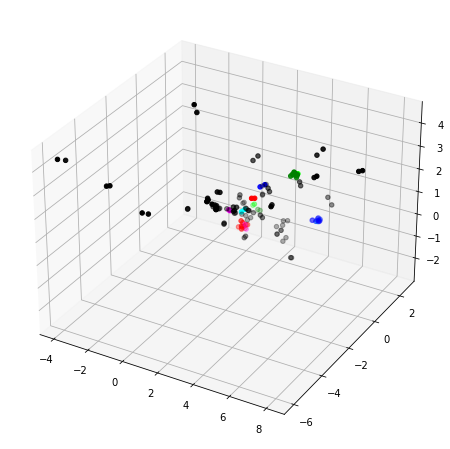

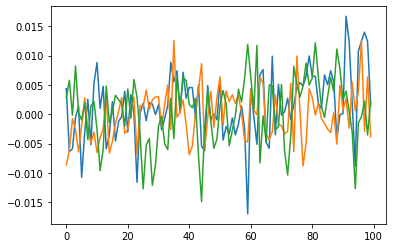

3775	-0.3251788344696871	-0.10962741590241278
red [ 0.67820865  0.99972678 -1.04043037] [0.23683506 0.07815838 0.51091684] [ 0.48894734  0.73718359 -0.77842827] [0.13595412 0.436708   0.58826997]
green [3.01006568 1.36502457 1.19210865] [0.58164006 0.19388111 0.59101685] [2.41734071 1.02646241 0.80606145] [0.87294959 0.43718239 0.64113694]
blue [ 3.8121982   1.87875492 -0.5081728 ] [0.86389084 0.35240877 0.54409793] [ 2.55970059  1.31367715 -0.49231309] [1.6208401  0.73266733 0.25905584]

3800	-0.325343350673295	-0.10939354644165668
red [ 0.68043818  1.00083938 -1.04085134] [0.23762505 0.07784747 0.51175503] [ 0.49072563  0.73719748 -0.77788485] [0.13626246 0.43583982 0.58791505]
green [3.01581475 1.36713082 1.19469097] [0.58296018 0.19398947 0.59233348] [2.42227056 1.02702554 0.80882939] [0.87369015 0.43834625 0.64158215]
blue [ 3.81833288  1.88141241 -0.50764361] [0.86445854 0.35211532 0.54493232] [ 2.56287389  1.31524306 -0.49241607] [1.62325304 0.73297627 0.25886376]

3825	-0.32550

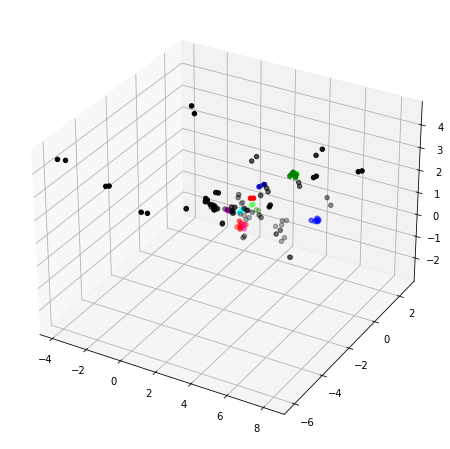

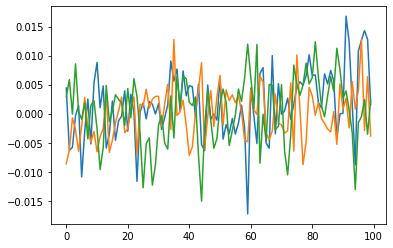

4025	-0.32674621198778303	-0.10715335870529023
red [ 0.70200688  1.01325226 -1.04524583] [0.24394006 0.07605201 0.51917044] [ 0.50899129  0.74071277 -0.77481055] [0.14104963 0.43039599 0.58547555]
green [3.0700813  1.38852461 1.21626735] [0.59594747 0.19569114 0.60433041] [2.4687918  1.03312671 0.83357925] [0.88169983 0.44978491 0.64429883]
blue [ 3.87592114  1.90704013 -0.50314886] [0.87066625 0.34968783 0.55169886] [ 2.59560269  1.33184162 -0.4925323 ] [1.64833794 0.7371483  0.25530061]

4050	-0.3268913269297968	-0.10690216693466018
red [ 0.70427166  1.01474184 -1.04575411] [0.24456822 0.07589635 0.51997908] [ 0.51114614  0.74143028 -0.77460656] [0.1418459  0.43010182 0.58526574]
green [3.07594286 1.39102733 1.21850432] [0.59741991 0.19594946 0.60564152] [2.47376421 1.03374678 0.8364105 ] [0.882419   0.45098735 0.64461093]
blue [ 3.88208781  1.90989571 -0.50257631] [0.87144654 0.34946136 0.55233548] [ 2.59892294  1.3335695  -0.49240552] [1.65096195 0.73751751 0.25469868]

4075	-0.327

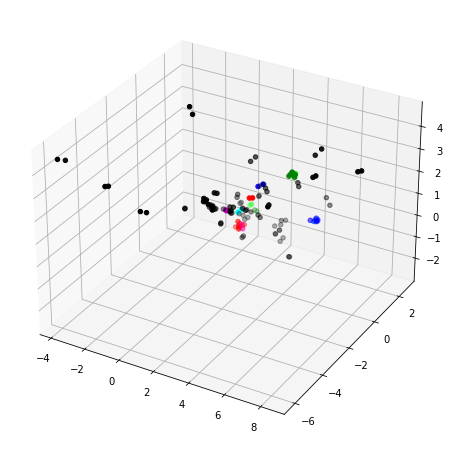

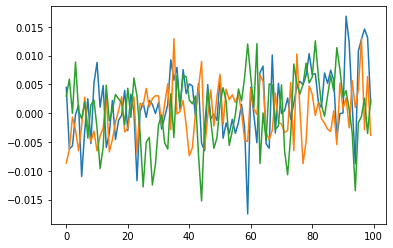

4275	-0.3281148978159653	-0.10470191817035053
red [ 0.72641816  1.02709272 -1.0482238 ] [0.24964285 0.07401045 0.52658003] [ 0.53037632  0.74730949 -0.77177901] [0.14760953 0.42726054 0.5833913 ]
green [3.12690881 1.41168226 1.23816881] [0.60970796 0.19772199 0.61707094] [2.51974822 1.04068515 0.8596768 ] [0.89009402 0.46140804 0.64761877]
blue [ 3.9372555   1.93485131 -0.4974861 ] [0.87798347 0.34754442 0.55863755] [ 2.63232602  1.35036135 -0.49092125] [1.67672378 0.74224942 0.24959155]

4300	-0.32824202670695646	-0.10444498592706818
red [ 0.72891371  1.02838447 -1.04823499] [0.25015317 0.07381285 0.52726001] [ 0.53234659  0.74798741 -0.77140728] [0.14807726 0.42705271 0.58327479]
green [3.13230555 1.41402488 1.24024199] [0.61105349 0.19803851 0.61823677] [2.52460222 1.04129777 0.86242874] [0.89089891 0.46255715 0.64793815]
blue [ 3.94307593  1.93753812 -0.4968314 ] [0.87860139 0.34734764 0.55936542] [ 2.63577159  1.35210992 -0.49065189] [1.67939094 0.74280514 0.24911351]

4325	-0.328

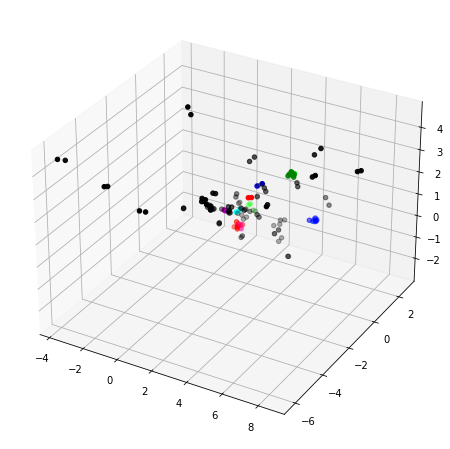

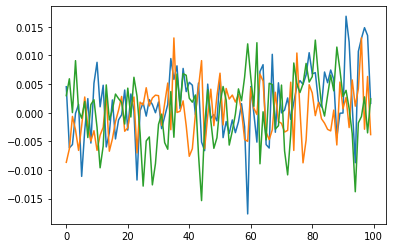

4525	-0.32933699676086226	-0.10205361868824288
red [ 0.7503841   1.03924654 -1.04814808] [0.25480293 0.07177314 0.53326652] [ 0.55032162  0.75399455 -0.76716301] [0.15360272 0.42523821 0.58081594]
green [3.18034445 1.43411496 1.26051295] [0.62348697 0.2006035  0.62948088] [2.56882226 1.04822508 0.88596002] [0.89844032 0.47334343 0.65040477]
blue [ 3.99570326  1.9617685  -0.49027205] [0.88488054 0.34593251 0.56567665] [ 2.66722772  1.36885341 -0.48931195] [1.70478609 0.74900498 0.24560926]

4550	-0.3294533466444031	-0.10177074482046178
red [ 0.75236266  1.04018639 -1.04802838] [0.25542993 0.07151746 0.53390325] [ 0.55198893  0.754398   -0.76647038] [0.15407712 0.42483592 0.58028932]
green [3.18528926 1.43605812 1.26287455] [0.62481228 0.20084155 0.63075599] [2.57346965 1.04875559 0.88874176] [0.89912264 0.47444992 0.65068307]
blue [ 4.00126371  1.9641621  -0.48933177] [0.8855751  0.34568969 0.56626174] [ 2.67046954  1.37047305 -0.48904031] [1.7075258  0.74956179 0.24511518]

4575	-0.329

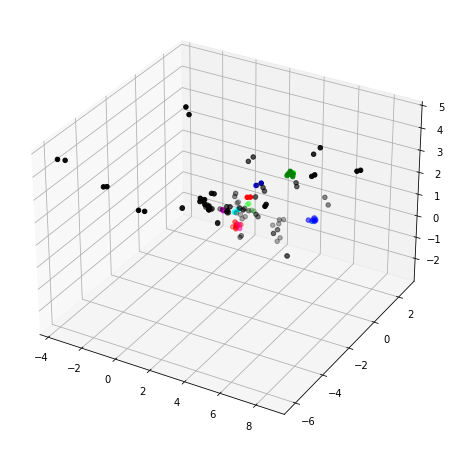

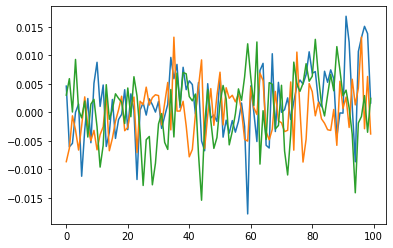

4775	-0.330444541537511	-0.09917732020048428
red [ 0.77012773  1.04899738 -1.04744906] [0.2609188  0.06972218 0.53958089] [ 0.56505182  0.75825429 -0.76207316] [0.15616858 0.42065396 0.57705043]
green [3.22745758 1.45351417 1.28102328] [0.63603521 0.20280238 0.64140699] [2.61432399 1.0542748  0.91174952] [0.90440385 0.48398659 0.65305399]
blue [ 4.04852457  1.98523576 -0.48266984] [0.89060939 0.34279196 0.57165914] [ 2.69813795  1.38466745 -0.48671788] [1.73031964 0.75314089 0.23999098]

4800	-0.3305482641977274	-0.09888381349487627
red [ 0.77230873  1.05023187 -1.04757637] [0.26147557 0.06962226 0.54024033] [ 0.56664604  0.75900011 -0.76186144] [0.15645346 0.42036842 0.57686069]
green [3.23212564 1.45582455 1.28254869] [0.63727715 0.20312962 0.6424791 ] [2.61886136 1.05522734 0.91376323] [0.90509442 0.48517775 0.65313905]
blue [ 4.05373916  1.98787465 -0.48234779] [0.89110599 0.34249602 0.57234594] [ 2.70125877  1.38650263 -0.48684882] [1.73282907 0.75361191 0.23962234]

4825	-0.33065

KeyboardInterrupt: 

In [398]:
L = loss
LG = loss_and_grad


weights = np.random.normal(size=(W // D, FEATURES)) / (W // D * FEATURES)


def evaluate(step):
    l = L(weights, train_dataset, l1=L1, l2=L2, alpha=ALPHA, d=D)
    lt = L(weights, test_dataset, l1=L1, l2=L2, alpha=ALPHA, d=D)
    print(step, l, lt, sep='\t')
    test_out = {c: np.array(test_data[c])[:,:W:D] @ weights for c in RGB}
    train_out = {c: np.array(train_data[c])[:,:W:D] @ weights for c in RGB}
    for c in RGB:
        print(c, train_out[c].mean(0), train_out[c].std(0), test_out[c].mean(0), test_out[c].std(0))
    print()
    

for i in range(10000):
    if i % 25 == 0:
        evaluate(i)
        
        if i % 250 == 0:
            show_weights_out(test_data, train_data, weights)

    l, g = LG(weights, train_dataset, l1=L1, l2=L2, alpha=ALPHA, d=D)
    weights -= LR * g


evaluate(1000)
show_weights_out(test_data, train_data, weights)

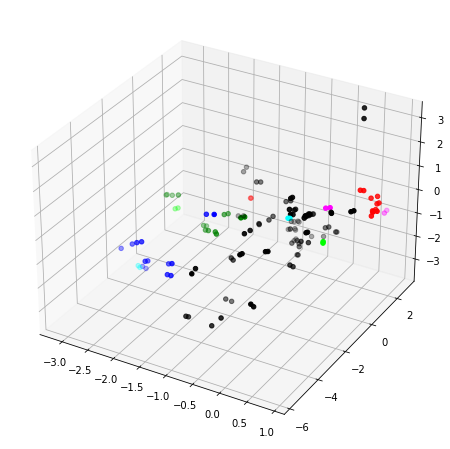

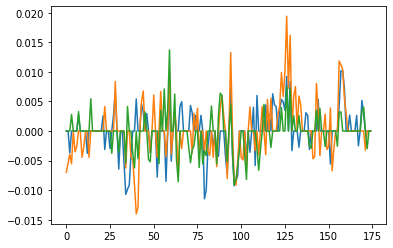

In [332]:
show_weights_out(test_data, train_data, weights * (np.abs(weights) > 0.0025))

In [336]:
checkpoint = weights

0	-0.17099269881967696	-0.23264083371110533
red [-1.09079152  0.58613923  0.41039576] [0.77252245 0.46835032 0.32747453] [-1.45483143  0.65705965  0.32972352] [0.89823594 0.88486883 0.10683409]
green [-1.51710375  0.42563211  0.71043558] [1.35988138 0.95088422 0.4169841 ] [-0.76912115 -0.51026089  0.8170055 ] [0.72629438 0.42671877 0.60675524]
blue [-1.14424022  0.04219544  0.54898056] [1.08445605 0.43932136 0.56289386] [-0.80444132 -0.58462223  0.89661116] [0.28200636 0.34675332 0.60106889]



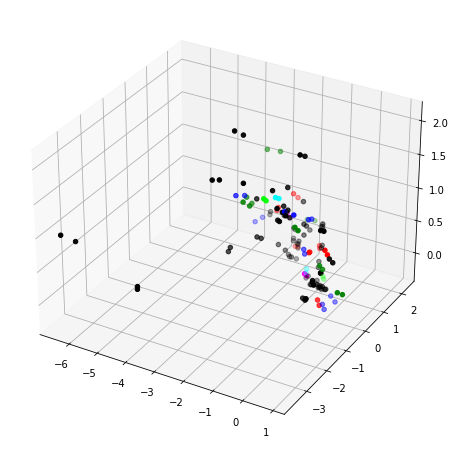

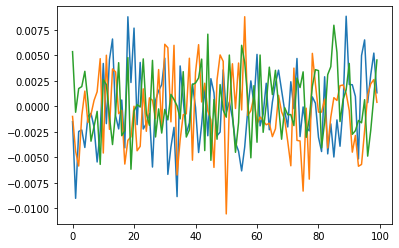

25	-0.1902789819147185	-0.2292200422660195
red [-0.52120764  0.24852628  0.46318623] [0.48163535 0.38672979 0.32887433] [-0.59496016  0.11294819  0.42362416] [0.14620457 0.40738112 0.18386611]
green [-0.22486629 -0.58899481  0.95598826] [0.59429523 0.58182462 0.46635906] [-0.18187995 -0.88930499  0.91745759] [0.18426111 0.7143517  0.62829238]
blue [-0.00228132 -0.81024692  0.74160699] [0.51901333 0.70681438 0.60362844] [ 0.01968882 -1.04658199  0.94645052] [0.40941223 0.70261524 0.6088855 ]

50	-0.2614263208734823	-0.22980604934231683
red [-0.13294487  0.26077787  0.46118802] [0.44496766 0.39340512 0.30957693] [-0.03374775  0.11164326  0.42374519] [0.31208554 0.41813751 0.17717119]
green [ 0.6838954  -0.798833    1.05546165] [0.54022482 0.47595414 0.46798978] [ 0.28361612 -0.91702151  0.92051999] [0.19556549 0.66461033 0.57126029]
blue [ 0.82338272 -0.95213515  0.76566593] [0.66962754 0.69261836 0.55583837] [ 0.61440357 -1.00379887  0.84366756] [0.85222711 0.61209012 0.4765481 ]

75	-0

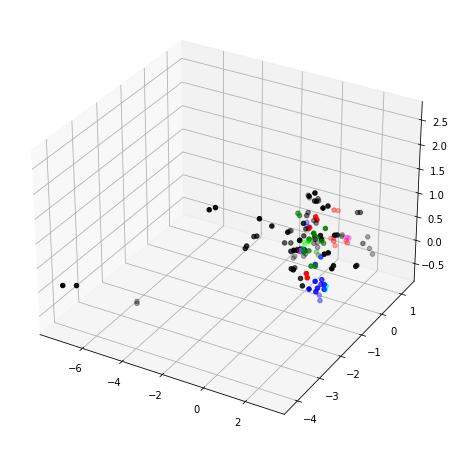

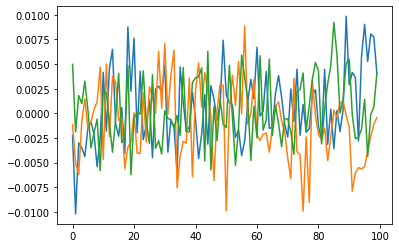

275	-0.4729922695796374	-0.2588256105894416
red [0.55935437 0.49154388 0.12655796] [0.29217703 0.5506655  0.3224813 ] [0.58893559 0.38171291 0.00558976] [0.38089349 0.79183637 0.14337963]
green [ 1.71035552 -1.34611823  0.90900085] [0.42683182 0.31904538 0.30464284] [ 1.20908233 -1.12449363  0.75899186] [0.63862715 0.50829897 0.31007628]
blue [ 1.96772378 -1.35317203  0.23087171] [0.66759284 0.51553997 0.32952958] [ 1.52735444 -1.06399355  0.1791915 ] [0.98318083 0.43108825 0.11327819]

300	-0.48165514149315	-0.2604537974389569
red [0.59694639 0.48504672 0.10167511] [0.29199962 0.54718825 0.32477205] [ 0.6171568   0.37047713 -0.01719869] [0.37927754 0.79398522 0.15191878]
green [ 1.74658605 -1.40350155  0.9206097 ] [0.41087764 0.32280023 0.31080391] [ 1.24059195 -1.15117459  0.7509282 ] [0.65663991 0.52306073 0.31261931]
blue [ 2.01510569 -1.39498064  0.20064481] [0.66020523 0.51373199 0.33824316] [ 1.56090755 -1.09265206  0.14323292] [0.97904604 0.44355514 0.12956283]

325	-0.48921409

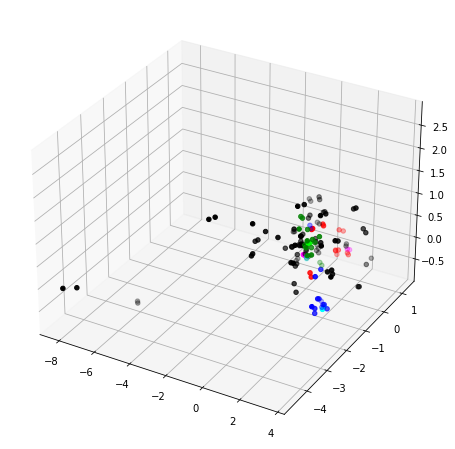

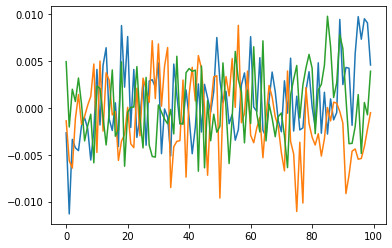

525	-0.5387433080654412	-0.2680488399434007
red [ 0.79001768  0.48780664 -0.14924857] [0.28335225 0.5489315  0.36067724] [ 0.77944725  0.32551905 -0.2489805 ] [0.40475432 0.80622053 0.23274977]
green [ 1.94734736 -1.69778371  0.96185326] [0.33418814 0.35919028 0.38417481] [ 1.37979202 -1.30417135  0.67964052] [0.74060036 0.61003433 0.37328709]
blue [ 2.32982277 -1.58981737 -0.12271379] [0.6422305  0.4726553  0.42461242] [ 1.76546604 -1.22594596 -0.18183027] [1.01105073 0.51935725 0.24334148]

550	-0.5440899618734019	-0.2685225799206587
red [ 0.80412665  0.48441319 -0.17288915] [0.28091227 0.54644011 0.36506917] [ 0.79125138  0.31726589 -0.27071159] [0.40681386 0.80431013 0.24084548]
green [ 1.96146301 -1.72390229  0.96774543] [0.32689394 0.36313481 0.39262389] [ 1.38678604 -1.32025537  0.68114814] [0.74381147 0.61992193 0.38695752]
blue [ 2.35721061 -1.60755821 -0.15277617] [0.64151695 0.46873878 0.43229278] [ 1.78204712 -1.23938684 -0.20639666] [1.01568394 0.52731829 0.24844908]

575	

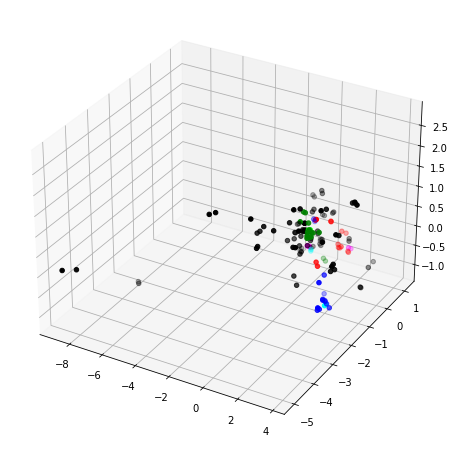

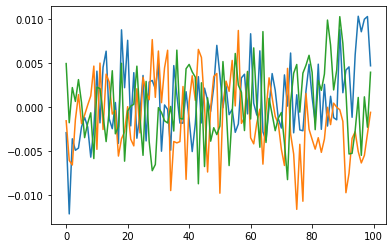

775	-0.585682299071671	-0.2706903925403409
red [ 0.91175662  0.44262492 -0.36263541] [0.25794795 0.52207841 0.41175324] [ 0.8805781   0.23226134 -0.44944461] [0.42763104 0.77253373 0.32568099]
green [ 2.06584316 -1.91592071  1.00044915] [0.26877951 0.39387041 0.45659645] [ 1.42567317 -1.44504185  0.70864791] [0.76717084 0.68834281 0.47899457]
blue [ 2.57240558 -1.74165171 -0.39834864] [0.63682231 0.43553898 0.48973753] [ 1.90889406 -1.33168662 -0.38716776] [1.06585174 0.5809091  0.29970213]

800	-0.5892681850304023	-0.2708152009865271
red [ 0.92090263  0.43599511 -0.38050813] [0.25439129 0.51919987 0.41555894] [ 0.88697326  0.2209797  -0.46485143] [0.42824451 0.76717425 0.33299571]
green [ 2.0733355  -1.93685183  1.00752985] [0.26258362 0.3976313  0.46390174] [ 1.42851139 -1.45959705  0.71079872] [0.76953256 0.69556186 0.48494094]
blue [ 2.59001085 -1.7581883  -0.41396389] [0.63484622 0.43375059 0.4907273 ] [ 1.91752192 -1.3429887  -0.39684537] [1.06865654 0.58815496 0.29820394]

825	-

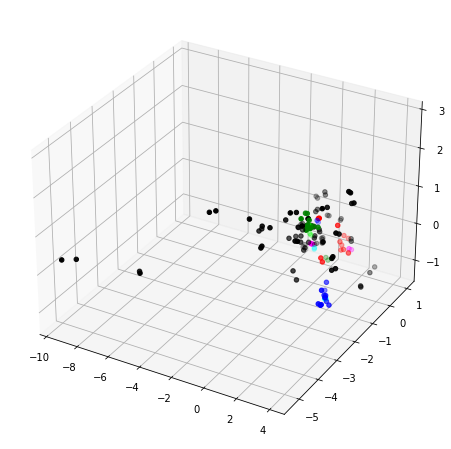

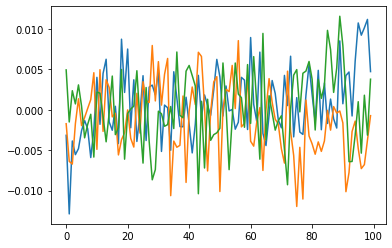

1025	-0.6124243426328093	-0.2726632089086535
red [ 1.00044683  0.3866243  -0.49152569] [0.22586891 0.50852736 0.43233918] [ 0.93508924  0.13275114 -0.53245943] [0.42953167 0.72378826 0.35594096]
green [ 2.13922089 -2.10375238  1.10248432] [0.21322284 0.43059732 0.51855496] [ 1.46348469 -1.57675534  0.75255141] [0.79190122 0.7519863  0.54397742]
blue [ 2.72010472 -1.89854893 -0.43780461] [0.60907786 0.42280843 0.46769831] [ 1.98205771 -1.43298696 -0.39517436] [1.08615442 0.65079997 0.23215978]

1050	-0.6143747959508448	-0.2730130327127847
red [ 1.01011438  0.3823686  -0.50160627] [0.22310336 0.50830565 0.43409928] [ 0.94173949  0.12532895 -0.53907083] [0.43115667 0.72046336 0.36004992]
green [ 2.14880664 -2.11871556  1.10912446] [0.20937212 0.43366151 0.52205172] [ 1.46973527 -1.58790186  0.75570042] [0.79501036 0.75715474 0.54812835]
blue [ 2.73557238 -1.91167804 -0.43977745] [0.60716955 0.42154409 0.46639071] [ 1.99042627 -1.44111559 -0.39511336] [1.08922044 0.65696932 0.22800942]

10

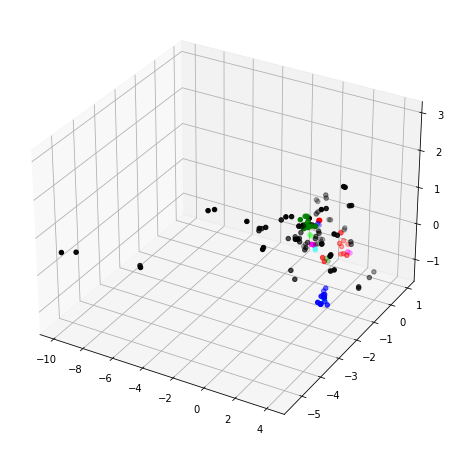

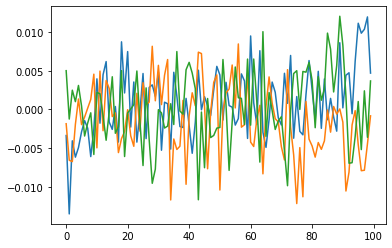

1275	-0.6276819587012114	-0.27719867239133256
red [ 1.09006396  0.33040606 -0.57319986] [0.1985985  0.50141427 0.44555148] [ 0.9920873   0.05415907 -0.57731939] [0.43891528 0.68693358 0.3769967 ]
green [ 2.22993553 -2.26030918  1.16318758] [0.17720649 0.46596794 0.55230517] [ 1.53146533 -1.69694164  0.7656354 ] [0.81829305 0.79770051 0.57437688]
blue [ 2.86353329 -2.0349414  -0.44369675] [0.59175513 0.41283775 0.46140216] [ 2.06707339 -1.51479704 -0.41333847] [1.12053094 0.70779607 0.21108768]

1300	-0.6288565299277487	-0.27761022740471875
red [ 1.09853956  0.32263477 -0.58093565] [0.19639788 0.49978933 0.44720039] [ 0.99740717  0.04484099 -0.58269965] [0.43999548 0.68194233 0.38025204]
green [ 2.23894175 -2.27702343  1.16484972] [0.17455109 0.47006061 0.55408358] [ 1.53796548 -1.71164183  0.76495307] [0.82099523 0.802536   0.57540869]
blue [ 2.87707438 -2.05012617 -0.44611522] [0.59034925 0.41261945 0.46184797] [ 2.07479833 -1.52390536 -0.41653313] [1.12413679 0.71373728 0.21075024]



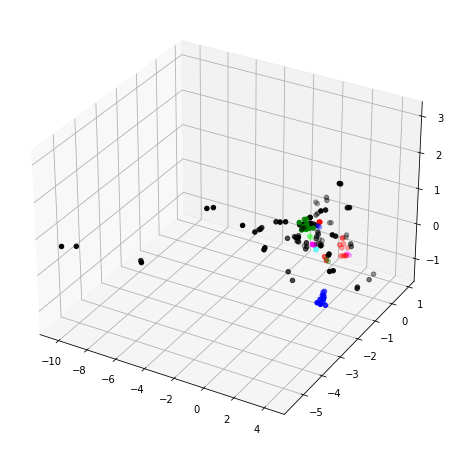

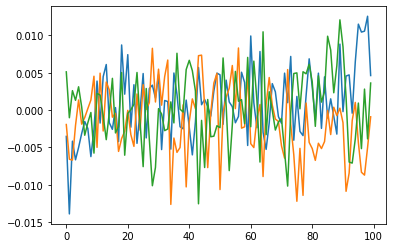

1525	-0.6377019910300734	-0.2804921125849969
red [ 1.16728584  0.26060813 -0.63436204] [0.18054853 0.48658047 0.45925446] [ 1.03986499 -0.02462329 -0.61570774] [0.45027409 0.64516048 0.39988487]
green [ 2.31554352 -2.40139777  1.18484337] [0.15637967 0.50232862 0.56998351] [ 1.58857946 -1.83084879  0.76811627] [0.84267404 0.83306178 0.58635817]
blue [ 2.99072974 -2.16572072 -0.45334176] [0.58125798 0.40807267 0.46471805] [ 2.13529927 -1.59123411 -0.42968474] [1.1556718  0.75960104 0.20175209]

1550	-0.638561256659754	-0.2807828749195041
red [ 1.17533188  0.25378275 -0.63994317] [0.17918262 0.48516192 0.46078157] [ 1.04516198 -0.03215651 -0.61874384] [0.45224215 0.64076387 0.40138045]
green [ 2.32522377 -2.41498677  1.18612796] [0.1553301  0.50640312 0.57149063] [ 1.59527104 -1.84395317  0.76864557] [0.84536003 0.83666351 0.58767484]
blue [ 3.00410772 -2.17869629 -0.45416407] [0.58110655 0.40817292 0.46515949] [ 2.14322862 -1.59951028 -0.43130903] [1.16063266 0.76619656 0.2010002 ]

157

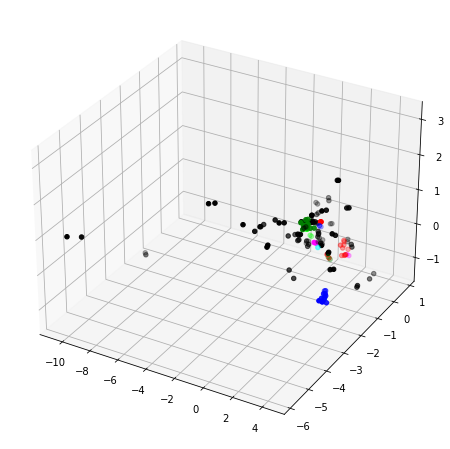

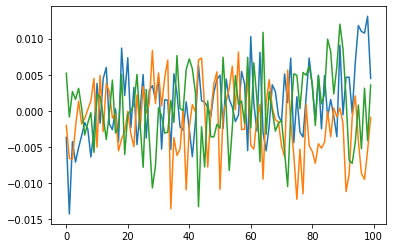

1775	-0.645623005555975	-0.2829351015154941
red [ 1.2396685   0.20074768 -0.67950753] [0.16610299 0.47519517 0.47277941] [ 1.08455254 -0.08586141 -0.64236911] [0.46542408 0.61105111 0.4169836 ]
green [ 2.40053271 -2.51810877  1.20175265] [0.14745646 0.53804966 0.58457707] [ 1.64917243 -1.95341027  0.78236044] [0.86586292 0.85839533 0.59959597]
blue [ 3.11557391 -2.27847871 -0.46014865] [0.58078654 0.40467017 0.47213638] [ 2.21104637 -1.66116979 -0.44419283] [1.20609886 0.8159252  0.20086033]

1800	-0.6463205534616164	-0.2831700084224115
red [ 1.24617204  0.1937678  -0.68234772] [0.16477474 0.47372254 0.47383814] [ 1.08829419 -0.09238528 -0.6436207 ] [0.4666701  0.60755184 0.41791672]
green [ 2.40822102 -2.52979425  1.2044776 ] [0.14677872 0.54163888 0.58623672] [ 1.65451735 -1.96555401  0.78527184] [0.8674705  0.86115297 0.60187585]
blue [ 3.12700399 -2.28958657 -0.45926127] [0.58083189 0.40423447 0.47261872] [ 2.21772457 -1.66833846 -0.4441512 ] [1.21070104 0.82150292 0.1999847 ]

182

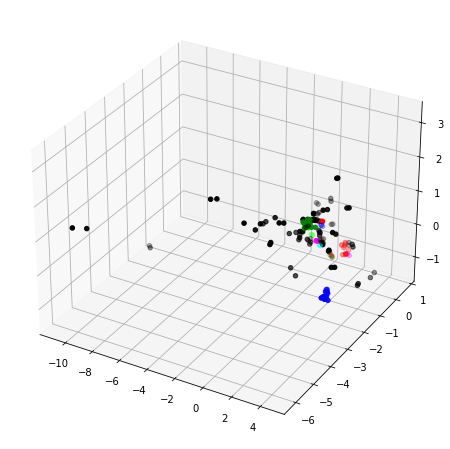

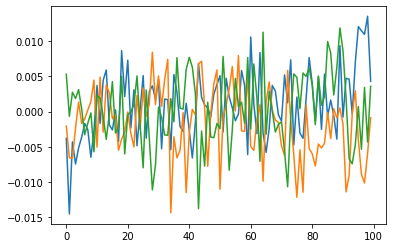

2025	-0.6520903381216735	-0.2850232895543201
red [ 1.30660302  0.14811273 -0.71329527] [0.1571207  0.46674694 0.48637975] [ 1.12330485 -0.13484416 -0.66143483] [0.47859978 0.58233431 0.4300713 ]
green [ 2.47505902 -2.6146437   1.22101766] [0.14227964 0.5705442  0.59924553] [ 1.70142106 -2.05589283  0.80637051] [0.88033781 0.87197173 0.61471816]
blue [ 3.22544401 -2.36931801 -0.46012473] [0.58075222 0.39721529 0.47886486] [ 2.27501172 -1.71148523 -0.45232579] [1.24920152 0.86099806 0.19866326]

2050	-0.6526614815653765	-0.28521242274479597
red [ 1.31220241  0.14216331 -0.71531945] [0.15608672 0.46572558 0.48740879] [ 1.12636709 -0.14051951 -0.66215312] [0.47962014 0.57899437 0.4308632 ]
green [ 2.48153548 -2.62452476  1.22325586] [0.1419359  0.57366563 0.60053862] [ 1.70547178 -2.06606386  0.80934949] [0.88134962 0.87309525 0.61604615]
blue [ 3.23534126 -2.37866746 -0.45964332] [0.58076929 0.39654154 0.47980037] [ 2.28019095 -1.71635656 -0.45265013] [1.2530024  0.86494947 0.19879251]

2

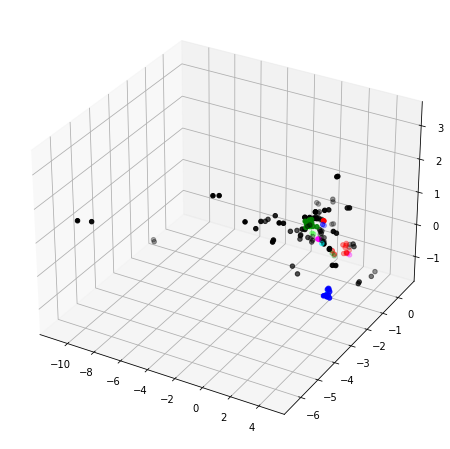

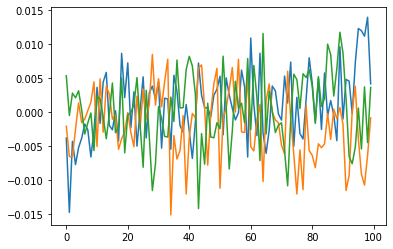

2275	-0.6573974815062563	-0.2860344210479708
red [ 1.36506498  0.09415569 -0.73651186] [0.15163513 0.45972429 0.49861642] [ 1.15666603 -0.18384281 -0.67191754] [0.48838772 0.55491723 0.43834565]
green [ 2.53860965 -2.7000825   1.24005109] [0.13953981 0.59745516 0.61212314] [ 1.73939422 -2.15042069  0.83348587] [0.89557005 0.87997436 0.62209685]
blue [ 3.32278495 -2.45302834 -0.45819216] [0.5805603  0.38872848 0.48780789] [ 2.32897024 -1.75450531 -0.45859047] [1.28729328 0.8980907  0.1997608 ]

2300	-0.6578784909809134	-0.28604391947481145
red [ 1.3712342   0.08909464 -0.73874412] [0.15161647 0.45928483 0.49989843] [ 1.16044103 -0.18835729 -0.67293948] [0.48963441 0.55234718 0.43916296]
green [ 2.54553714 -2.7080166   1.2415119 ] [0.1395587  0.60010571 0.61328785] [ 1.74296667 -2.15838821  0.83589864] [0.89733576 0.88028537 0.6226444 ]
blue [ 3.33256613 -2.4605481  -0.45821363] [0.58059949 0.38775868 0.48880918] [ 2.33427023 -1.75761918 -0.45921384] [1.2908296  0.90109116 0.19974534]

2

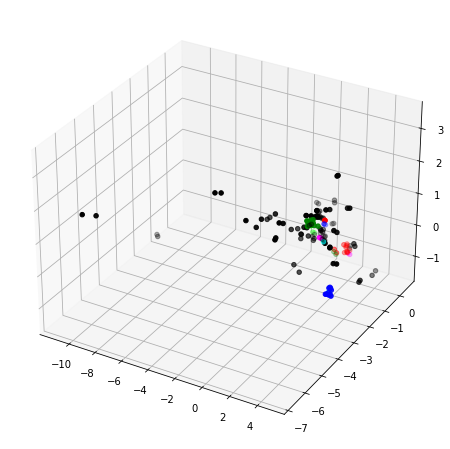

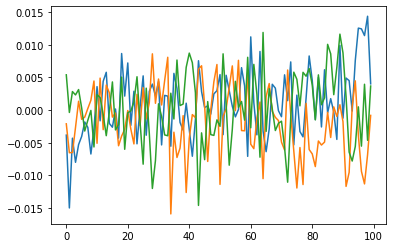

2525	-0.661787953991433	-0.2860650482543925
red [ 1.41597557  0.04697367 -0.75447175] [0.1474805  0.45717508 0.5101463 ] [ 1.18487174 -0.22786001 -0.6782085 ] [0.49525327 0.52852716 0.44375829]
green [ 2.59524003 -2.77823556  1.25797591] [0.13802149 0.62406318 0.62430935] [ 1.76981966 -2.23276958  0.86062553] [0.90807299 0.88477709 0.62828384]
blue [ 3.41018895 -2.5317243  -0.45559369] [0.58089197 0.38347866 0.49713779] [ 2.3739039  -1.79203464 -0.46106952] [1.31804679 0.93444565 0.19780824]

2550	-0.6621743333757963	-0.28596672943408963
red [ 1.41947165  0.04190991 -0.75518759] [0.14666766 0.45686256 0.51105455] [ 1.18630575 -0.23284077 -0.67780239] [0.49520757 0.52536827 0.44360948]
green [ 2.59920009 -2.7866732   1.26066843] [0.13769096 0.62693443 0.62565855] [ 1.77144213 -2.24160573  0.86439132] [0.90858028 0.88544139 0.62922675]
blue [ 3.41689913 -2.54034628 -0.45425279] [0.58060098 0.38336021 0.49781543] [ 2.37675819 -1.79653399 -0.46028856] [1.32013621 0.93848448 0.19703521]

25

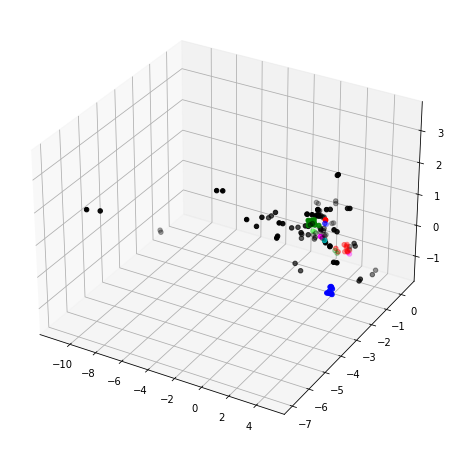

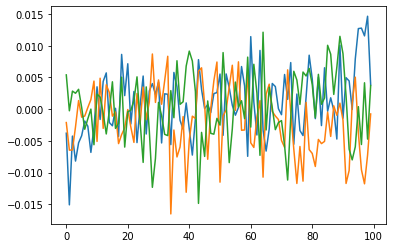

2775	-0.665364127047402	-0.2850126735361686
red [ 1.45758877e+00 -5.41266772e-04 -7.65664693e-01] [0.14164049 0.45535598 0.5200221 ] [ 1.20795961 -0.26940672 -0.68169585] [0.50040187 0.50505405 0.44772966]
green [ 2.64710002 -2.8492724   1.27239365] [0.13922922 0.64789834 0.63495458] [ 1.79758504 -2.31000799  0.88816795] [0.9202624  0.88544912 0.63092392]
blue [ 3.48969716 -2.605229   -0.4538724 ] [0.5819129  0.37740487 0.50710877] [ 2.41713636 -1.82946752 -0.46382331] [1.34846699 0.96831743 0.19679318]

2800	-0.6656929556322823	-0.28483457256430605
red [ 1.46118565 -0.00440508 -0.76692546] [0.14097313 0.45551381 0.52105717] [ 1.20958716 -0.27235869 -0.68234636] [0.50042775 0.50349075 0.44829645]
green [ 2.65127857 -2.8550528   1.27330986] [0.13918149 0.65006215 0.63595954] [ 1.7999784  -2.31675114  0.89059108] [0.92119563 0.88501397 0.63080544]
blue [ 3.49673328 -2.61157458 -0.45402813] [0.58184236 0.37672243 0.50813171] [ 2.42080977 -1.83245234 -0.46433397] [1.35101244 0.97146862 0.1

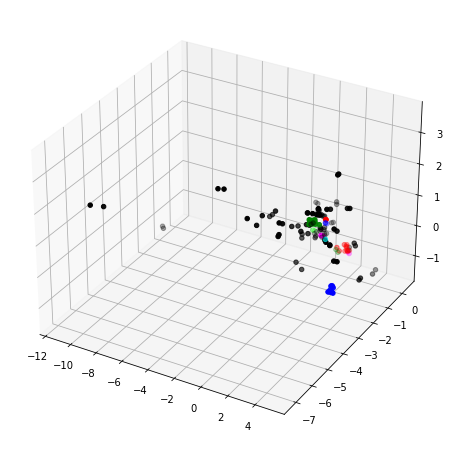

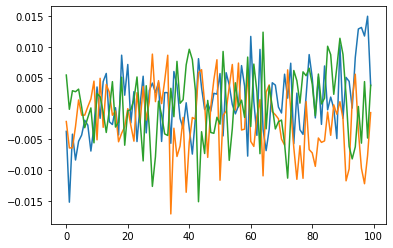

3025	-0.6684162079693543	-0.2838101710448761
red [ 1.49768682 -0.03890219 -0.77799794] [0.13837543 0.4568669  0.53017252] [ 1.2270799  -0.29888491 -0.6859314 ] [0.50099484 0.48955065 0.45054979]
green [ 2.69002565 -2.90414501  1.28310515] [0.13924402 0.66840961 0.64590342] [ 1.82427229 -2.37400552  0.90928074] [0.93224163 0.88163563 0.6285329 ]
blue [ 3.56007126 -2.66575245 -0.45403125] [0.58038953 0.37058484 0.5163372 ] [ 2.4559275  -1.8559559  -0.47072589] [1.37276674 0.99661417 0.19676958]

3050	-0.6686919771969388	-0.28378549040453427
red [ 1.50117491 -0.04257938 -0.778525  ] [0.13792812 0.45700854 0.53100479] [ 1.228677   -0.3017022  -0.68575096] [0.50114684 0.48810832 0.45066585]
green [ 2.69419375 -2.90904231  1.284286  ] [0.13948576 0.67020774 0.64681507] [ 1.8264977  -2.37975251  0.91161365] [0.93338725 0.88097865 0.62829527]
blue [ 3.5665541  -2.67101433 -0.45384008] [0.5802852  0.36970807 0.51741112] [ 2.45954073 -1.85801715 -0.47117983] [1.37529154 0.99882026 0.1969946 ]

3

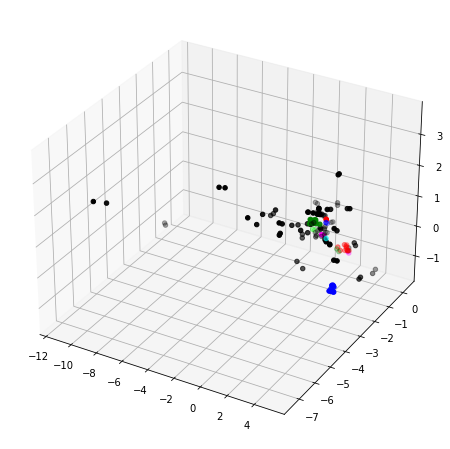

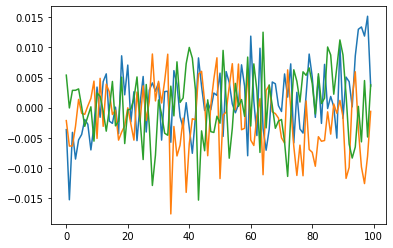

3275	-0.6709792764370552	-0.28345424267181013
red [ 1.52680292 -0.07583745 -0.78057031] [0.13244312 0.45883664 0.53818893] [ 1.23822844 -0.32882926 -0.68069274] [0.49986329 0.47439629 0.44972227]
green [ 2.72642321 -2.95610874  1.29659202] [0.14085384 0.68672356 0.65470291] [ 1.84387081 -2.43428674  0.93465998] [0.94220697 0.87636631 0.6261423 ]
blue [ 3.61953762 -2.72270093 -0.4488917 ] [0.57936999 0.36452807 0.52605538] [ 2.48789562 -1.88117418 -0.47185358] [1.39559129 1.02090036 0.19719197]

3300	-0.671209577312963	-0.2834141537225512
red [ 1.53018565 -0.07961419 -0.78098218] [0.13210974 0.45893881 0.53903392] [ 1.23996248 -0.33188175 -0.68031952] [0.50018665 0.47281225 0.44965097]
green [ 2.73095486 -2.96138913  1.29760078] [0.14134216 0.68863776 0.65551334] [ 1.8467671  -2.44056015  0.93686901] [0.94391967 0.87620859 0.62574691]
blue [ 3.62624239 -2.72857132 -0.44849998] [0.57956848 0.36419808 0.52693224] [ 2.49218603 -1.88445095 -0.47203791] [1.39867433 1.02411266 0.19704012]

33

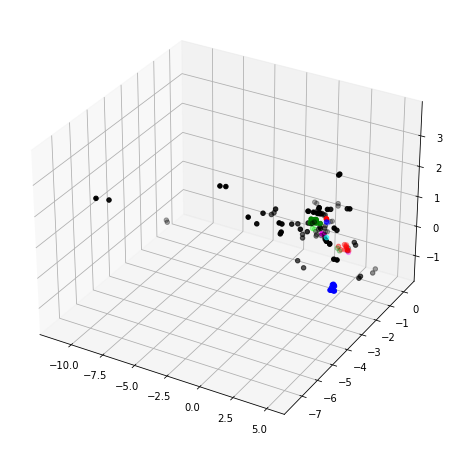

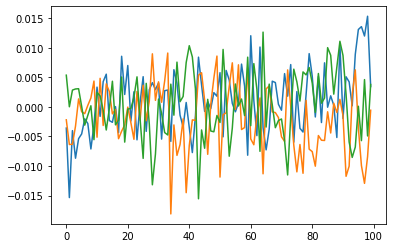

3525	-0.6731456598914022	-0.28264810666851425
red [ 1.56062829 -0.10566564 -0.78592724] [0.13023435 0.46179009 0.54711746] [ 1.2546918  -0.35129754 -0.6778166 ] [0.50165603 0.46291858 0.44925133]
green [ 2.76683573 -2.99704326  1.30527979] [0.14410424 0.7028052  0.66270328] [ 1.87163455 -2.48590333  0.95426975] [0.95672962 0.86841116 0.62117262]
blue [ 3.68159645 -2.77100964 -0.4456363 ] [0.5801871  0.36061205 0.5347112 ] [ 2.52725572 -1.9039245  -0.4751353 ] [1.42152273 1.04699788 0.19618266]

3550	-0.6733460122404945	-0.2825873864103858
red [ 1.56382307 -0.10778566 -0.78681285] [0.13000095 0.46230613 0.54807138] [ 1.25601574 -0.35269703 -0.67784903] [0.50153909 0.46239614 0.44945984]
green [ 2.77032218 -2.99992906  1.30562325] [0.14425052 0.70400554 0.66334372] [ 1.87433528 -2.48989388  0.9555275 ] [0.95781903 0.86695035 0.62037283]
blue [ 3.68730658 -2.77475476 -0.44583026] [0.58019126 0.36009436 0.53568925] [ 2.53081204 -1.90512054 -0.47599132] [1.42367187 1.04868805 0.19653635]

3

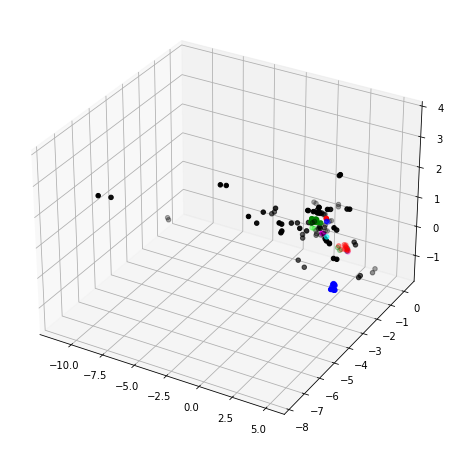

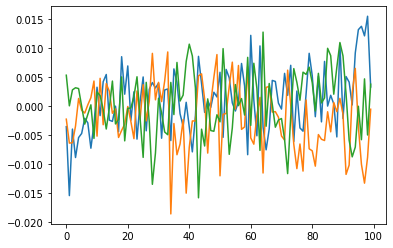

3775	-0.6750978037531187	-0.2829588656302794
red [ 1.59384611 -0.12887469 -0.79328165] [0.12858787 0.46652824 0.55639537] [ 1.27086998 -0.3675174  -0.67733583] [0.50394341 0.45640711 0.45141525]
green [ 2.80395909 -3.02713109  1.30933755] [0.14685783 0.71524114 0.66907901] [ 1.89848184 -2.52627751  0.96827709] [0.96743836 0.85586069 0.6147396 ]
blue [ 3.73945769 -2.8092738  -0.44633544] [0.58051499 0.35541834 0.54465396] [ 2.56185658 -1.9179987  -0.48070923] [1.44255109 1.06523252 0.19741174]

3800	-0.6752872036193601	-0.28295018195274774
red [ 1.59724464 -0.13053522 -0.79452337] [0.12850146 0.46719853 0.55745745] [ 1.27264134 -0.36848865 -0.67790417] [0.50428948 0.45614568 0.45202205]
green [ 2.80751985 -3.02917217  1.30900126] [0.14711539 0.71624519 0.66956188] [ 1.90096106 -2.52953912  0.96916959] [0.96835697 0.85409054 0.61368857]
blue [ 3.74503465 -2.81221361 -0.4470976 ] [0.58047917 0.35474897 0.54581594] [ 2.56486149 -1.9183517  -0.48186221] [1.44417338 1.06631268 0.19784191]

3

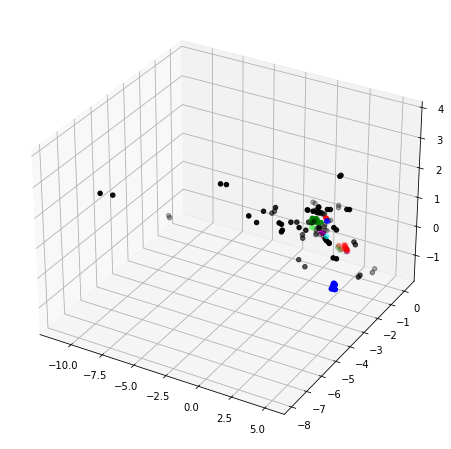

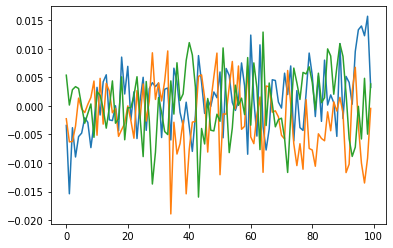

4025	-0.6769259686356505	-0.28366007940701526
red [ 1.62511273 -0.14629956 -0.80139743] [0.12676094 0.47250673 0.5659257 ] [ 1.28659081 -0.3774068  -0.67862082] [0.50745743 0.4535995  0.45520747]
green [ 2.83847563 -3.04872721  1.31123563] [0.15018335 0.7255829  0.67460418] [ 1.92278152 -2.56041473  0.98122306] [0.97753761 0.84073343 0.60632785]
blue [ 3.79338344 -2.83945475 -0.44902274] [0.58034094 0.34939622 0.5555378 ] [ 2.59220488 -1.92497757 -0.48756381] [1.4612844  1.07948459 0.19968239]

4050	-0.6771038447954201	-0.2836813585249077
red [ 1.62834228 -0.14769539 -0.80255459] [0.12666971 0.47312798 0.5669592 ] [ 1.28813662 -0.37809421 -0.67905931] [0.50771385 0.4533838  0.45570689]
green [ 2.84181681 -3.05075768  1.31107239] [0.15049069 0.72665657 0.67510224] [ 1.92532138 -2.56367526  0.98214435] [0.97856888 0.83912611 0.60521365]
blue [ 3.79859222 -2.84231286 -0.4496159 ] [0.58025198 0.3489691  0.55664161] [ 2.5953138  -1.92558388 -0.48865949] [1.46312604 1.08103873 0.20007146]

4

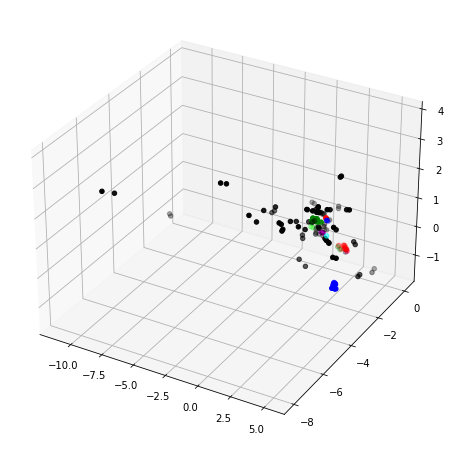

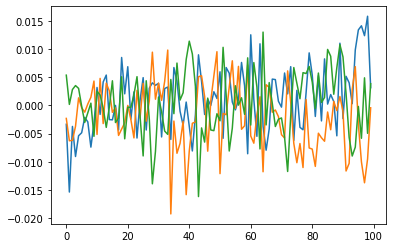

4275	-0.6786192792397816	-0.2836736561880715
red [ 1.65362271 -0.16232251 -0.80755047] [0.12440403 0.47803387 0.57488707] [ 1.29855808 -0.38676035 -0.67725403] [0.50888348 0.4503617  0.4569453 ]
green [ 2.86865312 -3.07005657  1.31540835] [0.15377347 0.73598922 0.68034243] [ 1.94611823 -2.59385726  0.99408735] [0.98616242 0.82651724 0.59904688]
blue [ 3.84153487 -2.86937267 -0.44848577] [0.57920465 0.34586694 0.56503526] [ 2.62062523 -1.93417394 -0.49226531] [1.47996464 1.09659159 0.19986681]

4300	-0.6787775796053218	-0.28366690779620624
red [ 1.65653853 -0.16401612 -0.80811281] [0.12425696 0.47852856 0.57576214] [ 1.29965126 -0.38778426 -0.67700996] [0.50887503 0.44998712 0.45701449]
green [ 2.87141474 -3.07228183  1.31599818] [0.15409047 0.73702341 0.6809344 ] [ 1.94860912 -2.59722643  0.99531716] [0.98687213 0.82529943 0.59853068]
blue [ 3.84602897 -2.87249835 -0.44814761] [0.57892252 0.34564939 0.56581886] [ 2.62332236 -1.93539461 -0.49246571] [1.48166135 1.09855316 0.19959655]

4

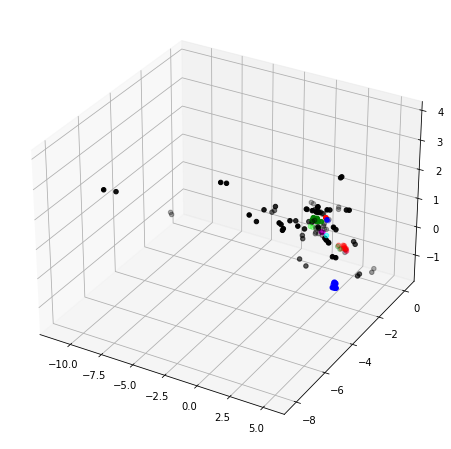

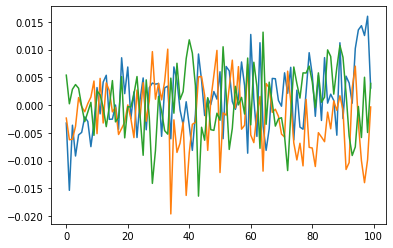

4525	-0.6801569084682512	-0.283867238155694
red [ 1.67927382 -0.18009688 -0.80918761] [0.12143015 0.4829417  0.58271312] [ 1.30860501 -0.39747315 -0.67274506] [0.51024107 0.44718557 0.4578595 ]
green [ 2.89612003 -3.0912154   1.32234633] [0.15826786 0.74527311 0.68539825] [ 1.96844278 -2.62792618  1.0092788 ] [0.99265975 0.81292973 0.59402128]
blue [ 3.88556974 -2.89897597 -0.44414911] [0.57722599 0.34287421 0.57376517] [ 2.64567855 -1.94516015 -0.49295586] [1.49814847 1.11339752 0.19876734]

4550	-0.68030681964931	-0.28389221212717053
red [ 1.68201322 -0.18220356 -0.8091869 ] [0.12122751 0.48338719 0.58347072] [ 1.30986209 -0.39881857 -0.67224279] [0.51054522 0.4468096  0.45797997]
green [ 2.89919064 -3.09363111  1.32305766] [0.15881209 0.74619032 0.68585878] [ 1.97099016 -2.6317394   1.01089826] [0.9935115  0.81183131 0.59353998]
blue [ 3.89034856 -2.90233621 -0.44368706] [0.5771011  0.34268062 0.57465458] [ 2.6484686  -1.94668679 -0.49292874] [1.50017925 1.1152283  0.19866946]

4575

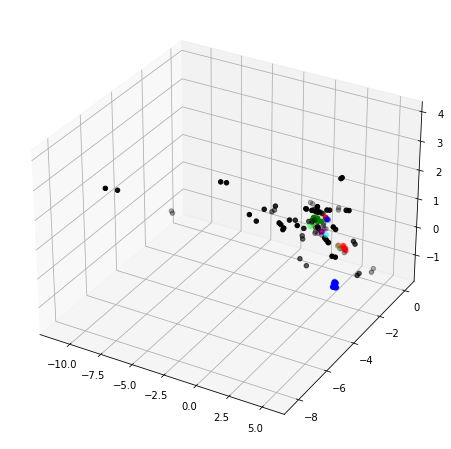

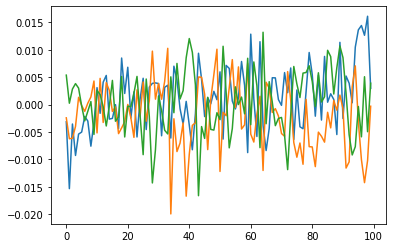

4775	-0.6816507929902265	-0.2847888618766362
red [ 1.70804999 -0.19934627 -0.81118094] [0.11972213 0.48813001 0.59087513] [ 1.32313981 -0.40940718 -0.66995309] [0.514514   0.44454347 0.46035718]
green [ 2.92872252 -3.11503417  1.32788218] [0.16389605 0.7542275  0.68993593] [ 1.99575242 -2.66534223  1.02361876] [1.00109434 0.80155816 0.58862862]
blue [ 3.93570368 -2.93332406 -0.44077783] [0.57659045 0.34193287 0.58260065] [ 2.67499542 -1.9608221  -0.49381114] [1.51877595 1.1321494  0.19776615]

4800	-0.6817990769830535	-0.2849374859233318
red [ 1.7111907  -0.20115561 -0.81153113] [0.119628   0.48869981 0.59174926] [ 1.32499614 -0.41050384 -0.66991094] [0.51524006 0.44438616 0.46080253]
green [ 2.9323366  -3.11733572  1.32824214] [0.16453455 0.75505183 0.6903385 ] [ 1.99867626 -2.66890018  1.02486999] [1.00201477 0.80030125 0.58799551]
blue [ 3.94104344 -2.93665759 -0.44063594] [0.5766104  0.34180972 0.5835588 ] [ 2.67825836 -1.96236377 -0.49407092] [1.52105124 1.13391126 0.19780952]

48

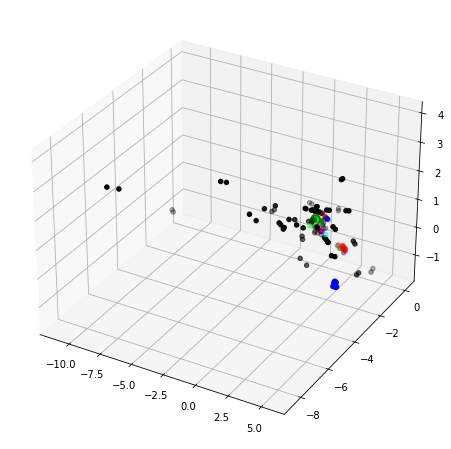

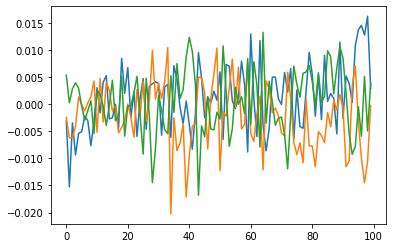

In [399]:
L = loss
LG = loss_and_grad

NR = 5
NO = 20
ALPHA_B = 0.2

weights = np.random.normal(size=(W // D, FEATURES)) / (W // D * FEATURES)


def evaluate(step):
    l = L(weights, train_dataset, l1=L1, l2=L2, alpha=ALPHA_B, d=D)
    lt = L(weights, test_dataset, l1=L1, l2=L2, alpha=ALPHA_B, d=D)
    print(step, l, lt, sep='\t')
    test_out = {c: np.array(test_data[c])[:,:W:D] @ weights for c in RGB}
    train_out = {c: np.array(train_data[c])[:,:W:D] @ weights for c in RGB}
    for c in RGB:
        print(c, train_out[c].mean(0), train_out[c].std(0), test_out[c].mean(0), test_out[c].std(0))
    print()

noise = np.std([d for c, d in train_dataset]) / 10
volume_range = (0.75, 1.5)

for i in range(5000):
    if i % 25 == 0:
        evaluate(i)
        
        if i % 250 == 0:
            show_weights_out(test_data, train_data, weights)

    batch = [
        (c, np.random.normal(loc=v, scale=noise) * np.random.uniform(*volume_range))
        for c, v in get_batch(train_dataset, NR, NO)
    ]
    l, g = LG(weights, train_dataset, l1=L1, l2=L2, alpha=ALPHA_B, d=D)
    weights -= LR * g


evaluate(5000)
show_weights_out(test_data, train_data, weights)

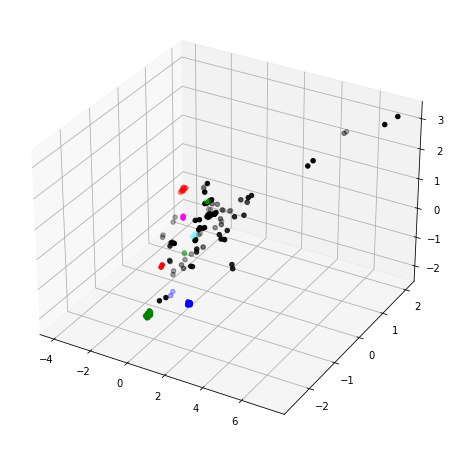

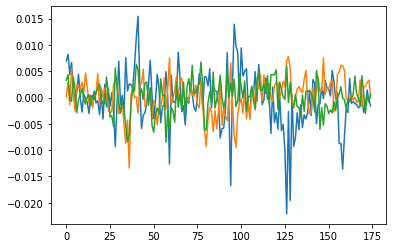

In [395]:
show_weights_out(test_data, train_data, weights[:500])

In [400]:
templates = {c: np.mean(np.array(data[c])[:,:W:D] @ weights, 0) for c in RGB}
templates

{'red': array([ 1.64404784, -0.25971026, -0.7810165 ]),
 'green': array([ 2.74526163, -3.03825947,  1.26827868]),
 'blue': array([ 3.69127486, -2.74434326, -0.44840887])}

In [401]:
for cat, vs in data.items():
    print('', *RGB, sep='\t\t\t')
    for v in vs:
        ft = v[:W:D] @ weights
        print(cat, *[np.sum(np.square(ft - templates[c])) for c in RGB], sep='\t')

			red			green			blue
blue	15.304249011532528	6.200515680864622	0.5677519412920105
blue	14.496516103368712	5.862558801661212	0.41869682183732804
blue	14.52087921355248	5.41889110905939	0.3736657185482991
blue	14.951831576120245	6.367954284518724	0.5452767929579079
blue	14.737283985946101	5.76854939004874	0.44524945220486434
blue	14.962578293886912	5.888595745476086	0.4874394999059188
blue	14.594365127539994	5.879544959814285	0.4373084064613251
blue	15.185589279531463	6.310858247961141	0.5671847706908588
blue	13.243016482428748	5.483413907565556	0.24006932132783332
blue	15.356496897457713	6.112118700430933	0.5646458285386551
blue	15.81643905728883	6.639893555260435	0.7099106131802752
blue	13.879655495725912	5.515987855793632	0.3079405789051001
blue	15.97413455421345	6.544462518799594	0.7150635285838515
blue	12.630641539126419	5.3012896445729325	0.16950923911925286
blue	6.854446630328194	1.1631698162388746	3.7497496573453954
blue	8.540522789514398	0.6295347806728315	3.6132143824182954
bl

In [402]:
for cat, vs in data_utils.process_data(data_utils.load_data('../data'), 2000, 2000).items():
    print('', *RGB, sep='\t\t\t')
    for v in vs:
        ft = v[:W:D] @ weights
        print(cat, *[np.sum(np.square(ft - templates[c])) for c in RGB], sep='\t')

blue
green
nie
one
red
tak
two
_
			red			green			blue
blue	15.616107306892859	6.080139885047668	0.5984105604137924
blue	14.230916606167565	5.728600594184657	0.3703349633390332
blue	15.636927834532804	6.606951846556659	0.6954854250972906
blue	14.728086801708224	6.489036542072213	0.5378457851082837
blue	15.008085490832043	5.930222426562621	0.5002596739185257
blue	14.887473770648414	5.82823188248741	0.4697521657167146
blue	14.755946000098168	5.7686106766301535	0.4471206382212222
blue	15.357958028134123	6.523524432508331	0.6228718244260827
blue	12.873440302703756	5.822196478907295	0.2576209803456857
blue	15.176992453335288	6.135660217605843	0.542893410323092
blue	15.869007893505492	6.804303367630352	0.7460357242555645
blue	14.011661834252505	5.6062735113618505	0.33210850187277585
blue	16.030572256760763	6.549130787737241	0.724100237959874
blue	12.707257198557356	5.203081889778613	0.1644306419186643
blue	6.896040974067793	1.1345660756626932	3.795957276839564
blue	8.632470150890489	0.599826

In [404]:
for c in RGB:
    print('{' + ', '.join(map(str, templates[c])) + 'f},')

{1.6440478433025387, -0.2597102612829352, -0.7810165042920804f},
{2.7452616337415376, -3.0382594711639617, 1.2682786828722663f},
{3.69127485706366, -2.7443432560585794, -0.44840886935115964f},


In [358]:
weights * 8000

array([[ 5.57721914e+01,  1.25258962e+00,  2.63911060e+01],
       [ 6.57810479e+01,  2.32395636e+01,  3.47042440e+01],
       [ 3.47428879e+01, -1.09441576e+01, -2.04107509e+00],
       [ 5.33161786e+01,  4.37071002e+01, -5.88208163e+00],
       [ 1.35947098e+01,  1.24760035e+01,  3.09237211e+01],
       [-1.15992125e+01, -2.06091668e+01,  1.26907838e+01],
       [ 9.75540602e+00,  1.97963179e+01, -2.29906962e+01],
       [ 3.53097458e+01,  1.53903038e+01, -3.12893034e+00],
       [ 2.62791212e-01,  1.36357829e+01,  4.95516443e+00],
       [-2.19639744e+01,  2.37043013e+01,  1.36587570e+01],
       [ 5.05196724e+00,  6.85750184e+00, -1.79275817e+00],
       [-1.53224536e+00,  3.72523496e+01, -9.92703580e+00],
       [-7.14608127e+00,  1.42672205e+01,  1.26261917e+00],
       [-2.42208192e+01, -8.70494324e+00,  4.30521126e+00],
       [ 3.06952190e+00,  5.00053044e-01, -1.21832761e+01],
       [-1.62503991e+00, -1.55272615e+01,  2.98916902e+00],
       [ 9.78991796e+00,  2.93864450e+00

In [405]:
print('{')
for r in weights:
    print('\t{' + 'f, '.join(map(str, r)) + 'f},')
print('}')

{
	{-0.0030270753478430037f, -0.0024818169382027164f, 0.005369979286418648f},
	{-0.01527664999493765f, -0.006206484681928966f, 0.00027785170385159584f},
	{-0.003443992704805346f, -0.006111483759117099f, 0.0028396432356579894f},
	{-0.009356303150769836f, -0.004095249311647302f, 0.003954698627727348f},
	{-0.005372974919763645f, 0.0013145389502550273f, 0.002986679471545985f},
	{-0.0050841994724439895f, -5.480886325961987e-05f, -0.00034312827106438535f},
	{-0.0021910686787817253f, -0.0012439722433397128f, -0.002948697018514235f},
	{-0.00302882267565548f, 0.00025267447907597137f, -0.0011812025383716189f},
	{-0.0076636557915343f, 0.0013548303906647365f, 0.0006233207338607992f},
	{-0.0032887090083973287f, 0.004276172760488921f, -0.005417137070192632f},
	{0.003043426609642979f, -0.00516566787250716f, 0.002588700377845833f},
	{-0.001593935133427447f, 0.004768175793860539f, 0.0018422445561304904f},
	{0.004049772417038963f, -0.0032798266541737764f, -0.0003698101940876126f},
	{0.005275732325615061

In [411]:
(data['red'][0][:W:D] @ weights - templates['red']) ** 2

array([0.03249584, 0.10699786, 0.16039968])